# Introduction

This project shows: 
- ability of writing solid,structured Python code 
- ability of using existing utilities(libraries) for processing and analyzing data.
- ability of utilizing Machine Learning models 
- statistical analysis application
- exploratory analysis application
- analytical and data pre-processing skills

Project is combined project that involves:
1. Data pre-processing
2. Exploratory Analysis
3. Statistical Analysis
4. Machine Learning

Combined project of the training course "[Specialist in Data Science](https://practicum.yandex.com/data-scientist)" by [Yandex Practicum](https://practicum.yandex.com/). Dataset of the project is provided by the [Zyfra](http://zyfra.com/) and [Yandex Practicum](https://practicum.yandex.com/).

Libraries that I have used in this project:

# Setting up the project

In [1]:
%%html
<style>
table {float:left}
</style>

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats as st
import warnings
# Reading files
import os 
from pathlib import Path
import urllib
# Machine Learning models for regression tasks
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Sanity check
from sklearn.dummy import DummyRegressor
# Splitting data into training, validation, test sampels 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
# Regression metrics - model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
# Feature scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Statistical tests
from scipy import stats as st
# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Setting up matplotlib

In [3]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [4]:
# increasing the resolution
%config InlineBackend.figure_format = 'retina'

In [5]:
# disable warnigns
warnings.filterwarnings('ignore')

In [6]:
# removing exponential notation
pd.options.display.float_format = '{:.3f}'.format

In [7]:
# displaying all columns
pd.set_option('display.max_columns', None)

# Combined Project

# Project "Optimization of gold mining company production"

## Project description

The company ["Zyfra"](http://zyfra.com/) develops solutions for the efficient operation of industrial plants. The company needs a machine-learning model to help optimize production to avoid launching enterprises with unprofitable characteristics.

## Technological process

When the mined ore undergoes primary processing, a crushed mixture is obtained. It is sent for flotation (enrichment) and two-stage purification:
1. Flotation - A mixture of gold-bearing ore is fed into the flotation plant. After beneficiation, a rough concentrate and "tailings", i.e. product leftovers with a low concentration of valuable metals, are obtained. The stability of this process is affected by the inconsistent and non-optimal physical and chemical state of the flotation slurry (mixture of solid particles and liquid).
2. purification - The crude concentrate undergoes two purifications. The output is the final concentrate and new tailings.

## Data description

### Technological process
- *Rougher feed*
- *Rougher additions* (or reagent additions): 
    - Xanthate
    - Sulphate
    - Depressant
- *Rougher process* - floatation
- *Rougher tails* 
- *Float banks* 
- *Cleaner process* 
- *Rougher Au* — gold rough concentrate
- *Final Au* — gold final concentrate

### Stage parameters
- *air amount* 
- *fluid levels* 
- *feed size* — raw material granule size
- *feed rate*

### Feature names

**[stage].[parameter_type].[parameter_name]**. Пример: **rougher.input.feed_ag**

Possible values for block **[stage]**:
- *rougher —* floatation
- *primary_cleaner* 
- *secondary_cleaner* 
- *final* — final characteristics

Possible values for block **[parameter_type]**:

- *input* — raw material characteristics
- *output* — product characteristics
- *state* — parameters that characterize the current state of the stage
- *calculation*

## Objective
The company needs a machine learning model to predict the recovery rate of gold from gold ore.  

## Work plan

1. [Overview of data](#review)
2. [Concentration efficiency](#checkConcentrationEfficiency)
3. [Unavailable features in test sample](#unavailableFeaturesTestSample)
4. [Data preprocessing](#dataPreprocessing)
    - [Columns processing](#columnsProcessing)
    - [Missing values](#missingValues)
5. [Data Analysis](#dataAnalysis)
    - [Concentration change](#concentrationChange)
        - [Au concentration analysis](#au_concentration)
        - [Ag concentration analysis](#ag_concentration)
        - [Pb concentration analysis](#pb_concentration)
    - [Comparison of raw material grain size distribution on the training and test sample](#distributionComparisonMaterial)
        - [Rougher stage](#rougherStage)
        - [Primary cleaner stage](#primaryCleaner_stage)
    - [Substances concentration research](#researchSubstancesConcentration)
6. [Machine Learning model research](#MLmodelResearch)
    - [sMAPE function](#sMAPEfunction)
    - [Model evaluation with cross-validation](#modelEvaluationWithCrossVal)
    - [Linear Regression](#LinearRegression)
    - [Decision Tree](#DecisionTree)
    - [Random Forest](#randomForest)
    - [Model research results](#modelResearchResults)
7. [Results](#results)

<br>

<a id="review"></a>
# Stage 1 - Overview of data

Reading the data and saving it in appropriate variables.

In [8]:
raw_gold_recovery_train = pd.read_csv('datasets/gold_recovery_train.csv',sep=',')
raw_gold_recovery_test = pd.read_csv('datasets/gold_recovery_test.csv',sep=',')
raw_gold_recovery_full = pd.read_csv('datasets/gold_recovery_full.csv',sep=',')

Let's write a function to display general information

In [9]:
def displayGeneralDataInfo(data):
    """
    Function to display general information
    data
    """
    print("Displaying 5 rows of data")
    print()
    # displaying 5 rows of data
    display(data.head())
    print("Display general information ")
    print()
    # displaying general info
    display(data.info())
    print("Data distribution")
    print()
    # displaying data distribution
    display(data.describe().T)
    print("Data correlations")
    print()
    # displaying data correlations
    display(data.corr())
    print()

Посмотрим на данные.

In [10]:
displayGeneralDataInfo(raw_gold_recovery_train)

Displaying 5 rows of data



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,10.128,7.250,0.989,8.548,10.390,19.529,34.174,14.937,2.535,7.476,2.107,1549.776,-498.912,1551.434,-516.403,1549.874,-498.667,1554.367,-493.428,41885.707,3481.779,3520.337,2.839,6.100,2.285,523.546,55.487,36.809,6.486,11.987,6.008,11.837,6.006,11.501,7.101,28.029,19.794,87.108,5.008,0.509,19.154,1.170,999.707,-404.067,1603.011,-434.715,1602.375,-442.204,1598.937,-451.294,1404.472,-455.463,1416.355,-451.940,14.500,4.695,8.765,2.606,25.853,-498.526,23.894,-501.406,23.962,-495.263,21.940,-499.341,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,10.296,7.250,1.003,8.559,10.497,19.369,34.119,16.251,3.050,6.734,2.353,1576.167,-500.905,1575.951,-499.866,1575.994,-499.315,1574.479,-498.932,42050.862,3498.371,3489.982,2.859,6.161,2.266,525.291,57.279,35.753,6.479,11.971,6.006,11.996,6.013,11.616,7.279,28.067,20.051,86.843,4.955,0.537,18.965,1.185,1000.286,-400.065,

Display general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner

None

Data distribution



,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,16788.000,4.717,2.097,0.000,3.971,4.869,5.821,16.002
final.output.concentrate_pb,16788.000,9.114,3.389,0.000,8.826,10.065,11.055,17.032
final.output.concentrate_sol,16490.000,8.301,3.826,0.000,6.939,8.557,10.290,18.125
final.output.concentrate_au,16789.000,39.467,13.917,0.000,42.056,44.499,45.976,53.611
final.output.recovery,15339.000,67.213,11.960,0.000,62.626,67.645,72.825,100.000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,16775.000,-500.230,76.984,-799.741,-500.531,-499.784,-496.532,-275.073
secondary_cleaner.state.floatbank5_b_air,16775.000,12.377,6.220,0.427,8.926,11.093,15.979,39.846
secondary_cleaner.state.floatbank5_b_level,16776.000,-498.956,82.146,-800.258,-500.148,-499.933,-498.418,-120.191
secondary_cleaner.state.floatbank6_a_air,16757.000,18.429,6.958,0.024,13.978,18.035,24.985,54.877


Data correlations



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000,0.658,0.705,0.654,-0.089,0.681,0.420,0.509,0.597,0.212,0.293,0.055,0.332,0.742,0.426,0.601,0.527,0.557,0.379,0.565,0.478,0.519,0.493,0.509,0.510,0.540,0.495,0.442,0.460,0.022,-0.010,0.042,0.249,0.702,0.487,0.353,0.119,0.573,0.633,0.219,0.521,0.287,0.179,0.638,0.455,0.531,0.569,0.058,0.166,0.350,0.039,0.096,0.390,0.190,0.457,0.316,0.436,0.302,0.441,0.333,0.461,0.315,0.448,0.330,0.467,0.211,0.436,0.362,0.355,0.414,0.358,0.413,0.387,0.455,0.367,0.473,0.274,0.435,0.244,0.384,0.265,0.523,0.218,0.450,0.380,0.452
final.output.concentrate_pb,0.658,1.000,0.640,0.881,-0.174,0.639,0.624,0.645,0.580,0.375,0.272,0.040,0.234,0.656,0.748,0.501,0.727,0.650,0.482,0.616,0.376,0.578,0.587,0.560,0.608,0.611,0.590,0.455,0.566,0.027,-0.011,0.053,-0.070,0.608,0.672,0.593,0.154,0.759,0.623,0.462,0.649,0.519,0.222,0.577,0.756,0.666,0.679,0.065,-0.089,0.487,-0.164,-0.035,0.418,0.376,0.519,0.346,0.505,0.320,0.485,0.366,0.486,0.332,0.493,0.357,0.590,0.544,0.415,0.358,0.488,0.484,0.475,0.495,0.450,0.460,0.453,0.443,0.330,0.457,0.334,0.488,0.372,0.531,0.313

In [11]:
displayGeneralDataInfo(raw_gold_recovery_test)

Displaying 5 rows of data



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.801,14.993,8.080,1.005,1398.981,-500.226,1399.145,-499.920,1400.103,-500.704,1399.002,-499.485,13.129,5.637,489.794,62.710,42.022,12.084,16.923,6.153,16.868,6.151,1001.849,-350.301,1249.739,-399.108,1249.751,-399.397,1198.288,-399.489,999.472,-399.531,949.566,-398.181,24.938,-500.491,14.948,-500.014,20.018,-450.396,13.987,-449.832,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709
1,2016-09-01 01:59:59,215.392,14.987,8.080,0.990,1398.778,-500.057,1398.055,-499.778,1396.151,-499.240,1399.508,-500.416,13.036,5.526,490.105,61.961,41.188,11.919,17.003,5.999,16.996,6.002,998.691,-350.426,1248.395,-399.946,1249.514,-399.631,1200.506,-399.942,1000.002,-399.492,950.200,-405.788,24.923,-499.814,14.931,-500.764,19.989,-450.114,14.093,-450.059,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819
2,2016-09-01 02:59:59,215.260,12.885,7.787,0.996,1398.494,-500.868,1398.860,-499.765,1398.076,-502.152,1399.497,-499.715,13.138,5.427,489.618,66.904,42.546,12.091,16.993,5.851,16.982,5.854,998.517,-349.784,1247.441,-400.264,1248.207,-401.074,1199.770,-400.791,999.926,-399.237,950.320,-400.864,24.909,-500.304,14.997,-500.994,20.040,-450.263,14.078,-449.661,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623
3,2016-09-01 03:59:59,215.336,12.007,7.640,0.864,1399.618,-498.864,1397.440,-499.211,1400.129,-498.356,1401.065,-501.039,12.401,5.115,476.618,59.866,41.060,12.182,16.532,5.802,16.515,5.804,1000.277,-350.173,1251.323,-398.655,1250.494,-399.747,1199.399,-397.503,1001.931,-400.438,950.735,-399.803,24.894,-499.382,14.917,-499.862,20.031,-449.373,14.014,-449.527,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710
4,2016-09-01 04:59:59,199.099,10.683,7.530,0.806,1401.268,-500.808,1398.129,-499.505,1402.172,-500.811,1399.481,-499.374,11.327,4.767,488.248,63.315,41.269,11.290,13.607,5.738,13.650,5.740,996.541,-350.563,1304.659,-399.512,1306.456,-399.051,1248.699,-400.877,1058.839,-398.988,949.645,-399.278,24.887,-499.357,14.979,-500.187,19.962,-450.639,14.009,-450.022,12.025,-500.786,8.

Display general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      58

None

Data distribution



,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5554.000,170.515,49.609,0.000,143.340,176.104,207.241,274.410
primary_cleaner.input.depressant,5572.000,8.483,3.353,0.000,6.411,8.023,10.018,40.025
primary_cleaner.input.feed_size,5856.000,7.265,0.612,5.650,6.886,7.259,7.650,15.500
primary_cleaner.input.xanthate,5690.000,1.321,0.693,0.000,0.889,1.183,1.764,5.433
primary_cleaner.state.floatbank8_a_air,5840.000,1481.990,310.453,0.000,1497.191,1554.660,1601.682,2212.432
primary_cleaner.state.floatbank8_a_level,5840.000,-509.058,61.339,-799.774,-500.455,-499.997,-499.575,-57.195
primary_cleaner.state.floatbank8_b_air,5840.000,1486.909,313.224,0.000,1497.150,1553.268,1601.785,1975.148
primary_cleaner.state.floatbank8_b_level,5840.000,-511.744,67.139,-800.029,-500.937,-500.067,-499.323,-142.527
primary_cleaner.state.floatbank8_c_air,5840.000,1468.495,309.981,0.000,1437.050,1546.161,1600.786,1715.054
primary_cleaner.state.floatbank8_c_level,5840.000,-509.741,62.672,-799.995,-501.300,-500.080,-499.010,-150.937


Data correlations



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000,0.509,0.121,0.538,0.187,0.179,0.175,0.215,0.144,0.154,0.193,0.086,0.475,0.497,0.571,-0.045,0.543,0.536,0.670,0.659,0.657,0.584,0.275,0.227,-0.081,0.019,-0.102,0.001,-0.121,0.044,-0.100,-0.055,-0.116,-0.008,0.105,0.083,0.276,0.084,0.181,0.114,0.194,0.105,0.330,0.221,0.363,0.123,0.126,0.202,0.186,0.061,-0.073,0.082
primary_cleaner.input.depressant,0.509,1.000,0.200,0.214,0.186,0.235,0.195,0.232,0.107,0.188,0.192,0.073,0.547,0.518,0.275,0.013,0.342,0.520,0.344,0.454,0.341,0.410,0.406,0.146,-0.251,-0.065,-0.263,-0.064,-0.261,-0.027,-0.267,-0.076,-0.280,-0.075,0.103,-0.007,0.251,-0.046,0.295,0.174,0.274,0.168,0.347,0.182,0.268,-0.033,-0.044,0.094,0.104,-0.013,-0.161,0.023
primary_cleaner.input.feed_size,0.121,0.200,1.000,-0.258,-0.017,0.030,-0.017,0.035,-0.029,0.028,-0.020,0.032,0.204,-0.004,0.020,-0.117,0.030,0.127,-0.148,0.135,-0.150,0.135,0.023,-0.205,0.033,0.042,0.048,0.041,0.002,0.060,0.004,0.002,-0.062,0.029,-0.079,0.030,-0.131,0.009,0.024,0.024,-0.010,0.004,-0.109,-0.047,-0.138,-0.108,-0.159,-0.011,-0.189,-0.010,0.032,-0.034
primary_cleaner.input.xanthate,0.538,0.214,-0.258,1.000,0.326,0.222,0.305,0.223,0.264,0.207,0.316,0.131,0.273,0.380,0.553,0.144,0.475,0.318,0.610,0.454,0.656,0.398,0.423,0.450,-0.018,-0.125,-0.050,-0.149,-0.076,-0.139,0.003,-0.184,0.016,-0.162,0.158,0.151,0.325,0.147,0.106,0.174,0.087,0.162,0.397,0.286,0.430,0.237,0.191,0.287,0.195,0.204,-0.046,0.226
primary_cleaner.state.floatbank8_a_air,0.187,0.186,-0.017,0.326,1.000,0.867,0.995,0.770,0.970,0.858,0.992,0.781,0.600,0.514,0.526,0.032,0.595,0.619,0.167,0.407,0.514,0.239,0.802,0.399,0.795,0.603,0.774,0.573,0.735,0.534,0.815,0.526,0.799,0.523,0.748,0.798,0.723,0.719,0.631,0.666,0.595,0.579,0.733,0.771,0.690,0.524,0.675,0.868,0.606,0.751,0.624,0.759
primary_cleaner.state.floatbank8_a_level,0.179,0.235,0.030,0.222,0.867,1.000,0.862,0.868,0.838,0.967,0.860,0.869,0.610,0.576,0.546,0.056,0.641,0.637,0.116,0.419,0.494,0.190,0.826,0.466,0.732,0.516,0.690,0.475,0.657,0.450,0.714,0.428,0.720,0.428,0.704,0.817,0.653,0.755,0.551,0.699,0.473,0.590,0.656,0.782,0.583,0.541,0.545,0.846,0.465,0.722,0

In [12]:
displayGeneralDataInfo(raw_gold_recovery_full)

Displaying 5 rows of data



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,10.128,7.250,0.989,8.548,10.390,19.529,34.174,14.937,2.535,7.476,2.107,1549.776,-498.912,1551.434,-516.403,1549.874,-498.667,1554.367,-493.428,41885.707,3481.779,3520.337,2.839,6.100,2.285,523.546,55.487,36.809,6.486,11.987,6.008,11.837,6.006,11.501,7.101,28.029,19.794,87.108,5.008,0.509,19.154,1.170,999.707,-404.067,1603.011,-434.715,1602.375,-442.204,1598.937,-451.294,1404.472,-455.463,1416.355,-451.940,14.500,4.695,8.765,2.606,25.853,-498.526,23.894,-501.406,23.962,-495.263,21.940,-499.341,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,10.296,7.250,1.003,8.559,10.497,19.369,34.119,16.251,3.050,6.734,2.353,1576.167,-500.905,1575.951,-499.866,1575.994,-499.315,1574.479,-498.932,42050.862,3498.371,3489.982,2.859,6.161,2.266,525.291,57.279,35.753,6.479,11.971,6.006,11.996,6.013,11.616,7.279,28.067,20.051,86.843,4.955,0.537,18.965,1.185,1000.286,-400.065,

Display general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner

None

Data distribution



,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,22627.000,4.782,2.030,0.000,4.019,4.954,5.863,16.002
final.output.concentrate_pb,22629.000,9.095,3.231,0.000,8.750,9.915,10.930,17.032
final.output.concentrate_sol,22331.000,8.640,3.785,0.000,7.117,8.909,10.706,19.616
final.output.concentrate_au,22630.000,40.001,13.398,0.000,42.384,44.653,46.112,53.611
final.output.recovery,20753.000,67.447,11.616,0.000,63.282,68.322,72.951,100.000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,22615.000,-503.323,72.926,-799.741,-500.629,-499.865,-498.489,-244.484
secondary_cleaner.state.floatbank5_b_air,22615.000,11.627,5.757,0.427,8.038,10.990,14.001,39.846
secondary_cleaner.state.floatbank5_b_level,22616.000,-500.522,78.956,-800.258,-500.168,-499.952,-499.492,-120.191
secondary_cleaner.state.floatbank6_a_air,22597.000,17.977,6.636,-0.079,13.968,18.004,23.010,54.877


Data correlations



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000,0.652,0.700,0.646,0.010,0.675,0.424,0.490,0.578,0.219,0.275,0.040,0.274,0.720,0.418,0.593,0.489,0.539,0.377,0.538,0.441,0.479,0.458,0.474,0.469,0.497,0.456,0.426,0.419,0.152,-0.007,0.039,0.212,0.686,0.490,0.333,0.092,0.541,0.621,0.205,0.498,0.284,0.204,0.622,0.440,0.510,0.542,0.099,0.184,0.324,0.025,0.096,0.363,0.145,0.413,0.306,0.397,0.293,0.396,0.318,0.411,0.300,0.394,0.307,0.458,0.189,0.429,0.343,0.323,0.387,0.330,0.384,0.345,0.402,0.337,0.425,0.251,0.389,0.240,0.304,0.232,0.475,0.193,0.398,0.350,0.410
final.output.concentrate_pb,0.652,1.000,0.605,0.873,-0.056,0.597,0.611,0.635,0.535,0.314,0.268,-0.010,0.226,0.615,0.729,0.473,0.690,0.619,0.472,0.566,0.346,0.535,0.551,0.520,0.567,0.563,0.551,0.437,0.525,0.182,-0.007,0.051,-0.123,0.558,0.646,0.572,0.156,0.727,0.579,0.440,0.596,0.504,0.209,0.539,0.735,0.640,0.638,0.085,-0.189,0.466,-0.138,-0.104,0.403,0.375,0.467,0.315,0.451,0.289,0.432,0.325,0.440,0.293,0.453,0.309,0.571,0.540,0.372,0.339,0.462,0.459,0.454,0.466,0.405,0.440,0.394,0.431,0.326,0.442,0.332,0.438,0.350,0.503,0.304

Data Observations.

 |Dataframe      |Comment
 |:---------------|:------------------------|
|raw_gold_recovery_train       |**87** columns. Almost all features have the *float* data type. In the data there is a column indicating the date, which has the *object* data type. We need to convert it to the corresponding data type . **16860** objects. The number of objects in each column is different. Consequently, we have missing values. All steps (*flotation, primary purification, secondary purification, final characteristics*) of the process are included in the training sample. There are negative values in several columns.|
|raw_gold_recovery_test       |**57** columns and **5856** objects. It is worth noting that not all stages are included in the test sample. **The "final characteristics" stage is not included**. The number of objects in each column is different. Consequently, we have missing values. There are negative values in several columns.|
|raw_gold_recovery_full     |The original sample has **87** columns and **22716** objects. The number of objects in each column is different. Therefore, we have missing values. There are negative values in several columns. |

## Summary

There is a date column in the data that has the *object* data type. We need to convert it to the appropriate data type. The number of objects is different for dataframes. There are missing values. All stages (*flotation, primary purification, secondary purification, final characteristics*) of the technological process are included in the training sample. It is worth noting that not all stages are included in the test sample. The stage **"final characteristics "** is not included. There are negative values in several columns. We need:
1. Verify the effectiveness of enrichment and analyze features that are not available in the test sample.
2. Pre-process the data. The data is raw, we need to: process missing values, check the data for duplicates and anomalous values.
3. Analyze the data. Find out how metal concentrations change in different stages of purification. Compare distributions of granules of raw materials on the training and test samples. Investigate the total concentration of all substances at various stages. 
4. Investigate different machine learning models and evaluate their quality on cross validation.

<br>

<a id="checkConcentrationEfficiency"></a>
# Stage 2 - Concentration efficiency

At this stage we need to check the efficiency of enrichment. Let's calculate it on the training sample for the feature **rougher.output.recovery**. Let's calculate *MAE* between the obtained calculations and the value of the feature.

Let's take the data without missing values. 

In [13]:
raw_non_nan_gold_recovery_train = raw_gold_recovery_train.dropna()

Saving variables to calculate enrichment efficiency

In [14]:
# fraction of gold in the concentrate after flotation/treatment;
C = raw_non_nan_gold_recovery_train['rougher.output.concentrate_au']
# fraction of gold in the concentrate after flotation/treatment;
F = raw_non_nan_gold_recovery_train['rougher.input.feed_au']
# fraction of gold in tailings after flotation/treatment.
T = raw_non_nan_gold_recovery_train['rougher.output.tail_au']

In [15]:
# Calculate the efficiency according to the formula
recovery = ((C * (F-T)) / (F * (C-T))) * 100

Calculating MAE

In [16]:
mae = mean_absolute_error(raw_non_nan_gold_recovery_train['rougher.output.recovery'], recovery)
print(f'MAE between the calculated value and the value of the feature: {mae}')

MAE between the calculated value and the value of the feature: 9.555596961987514e-15


## Summary

The average standard deviation is practically equal to *0*. Consequently, the enrichment efficiency is calculated correctly using the formula.

<br>

<a id="unavailableFeaturesTestSample"></a>
# Stage 3 - Unavailable features in the test sample

Earlier, we noticed during the data review stage that the test sample has less features compared to the training sample.

Let's see which features are missing from the test sample.

In [17]:
# save the columns from the training sample and the test sample 
train_columns = raw_gold_recovery_train.columns
test_columns = raw_gold_recovery_test.columns

In [18]:
column_difference = list(set(train_columns) - set(test_columns))

In [19]:
np.sort(column_difference)

array(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag',
       'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       

As we can see, the final stage is missing in the test sample: final concentrate and "tailings". In addition to the final stage, there are rough concentrate and "tailings" at the *flotation* and *primary* and *secondary* purification stages among the detractors. Some calculation and output characteristics of the process are not available in the test sample, because they cannot be obtained/measured while the process is running.

## Summary

We need to predict two target metrics: **rougher.output.recovery** - *performance of rough concentrate enrichment*,**final.output.recovery** - *performance of final concentrate enrichment*. We will leave these target attributes. The others are the features that are measured and/or calculated later, i.e. we cannot get them at the start. Therefore, we remove them.

<br>

<a id="dataPreprocessing"></a>
# Stage 4 - Data pre-processing

At this stage we need to preprocess the data, because the data is raw. Let's process the column that specifies the date, which has the *object* data type. It is necessary to translate it into the appropriate data type. Index the data by date and time.In addition, we will process the missing values and check the data for duplicates. Prepare the training sample - remove the features that are not in the test sample. Restore the target attributes in the test sample.

<a id="columnsProcessing"></a>
## Columns Processing

The *date* column has the data type *object*. We need to translate the data type of this column to *datetime* so that Python understands that we are working with dates.

Let's use the function *to_datetime*.

In [20]:
raw_gold_recovery_train['date'] = pd.to_datetime(raw_gold_recovery_train['date'],format='%Y-%m-%dT%H:%M:%S')
raw_gold_recovery_test['date'] = pd.to_datetime(raw_gold_recovery_test['date'],format='%Y-%m-%dT%H:%M:%S')
raw_gold_recovery_full['date'] = pd.to_datetime(raw_gold_recovery_full['date'],format='%Y-%m-%dT%H:%M:%S')

We index the data by date and time. Let's write a function for indexing.

In [21]:
def indexing(df,column):
    """
    Function for indexing data
    df - dataframe (samples)
    column - column by which the data are indexed
    """
    df_copy = df.copy()
    df_copy_indexed = df_copy.set_index(column)
    return df_copy_indexed

In [22]:
raw_gold_recovery_train_indexed = indexing(raw_gold_recovery_train,'date')
raw_gold_recovery_test_indexed = indexing(raw_gold_recovery_test,'date')
raw_gold_recovery_full_indexed = indexing(raw_gold_recovery_full, 'date')

<a id="missingValues"></a>
## Missing values

Check the data for missing values. Which columns have missing values. Let's use the *isna()* and *sum()* methods. 

In [23]:
for df in [raw_gold_recovery_train,raw_gold_recovery_test,raw_gold_recovery_full]:
    print()
    display(df.isna().sum())
    print()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

The problem statement says: "The data are indexed by the date and time the information was received (date attribute). Time-neighboring parameters are often similar."

There are a lot of missing values. If we just drop (delete) them, we will lose most of the data. So we will fill the data with neighboring values. However, we will remove the missing values in the target attributes because it would not be meaningful to fill them.

Let's see how many missing values are in the target features: **rougher.output.recovery** - *performance of rough concentrate enrichment*,**final.output.recovery** - *performance of final concentrate enrichment

In [24]:
print('Training sample')
train_rougher_recovery_missing = raw_gold_recovery_train_indexed['rougher.output.recovery'].isna().sum()
train_final_recovery_missing = raw_gold_recovery_train_indexed['final.output.recovery'].isna().sum()
print(f'Share of missing values rougher: {round(train_rougher_recovery_missing/ len(raw_gold_recovery_train_indexed) * 100,1)}%')
print(f'Share of missing values final: {round(train_final_recovery_missing/ len(raw_gold_recovery_train_indexed) * 100,1)}%')
print()
print('Original sample')
full_rougher_recovery_missing = raw_gold_recovery_full_indexed['rougher.output.recovery'].isna().sum()
full_final_recovery_missing = raw_gold_recovery_full_indexed['final.output.recovery'].isna().sum()
print(f'Share of missing values rougher: {round(full_rougher_recovery_missing/ len(raw_gold_recovery_full_indexed) * 100,1)}%')
print(f'Share of missing values final: {round(full_final_recovery_missing/ len(raw_gold_recovery_full_indexed) * 100,1)}%')
print()

Training sample
Share of missing values rougher: 15.3%
Share of missing values final: 9.0%

Original sample
Share of missing values rougher: 13.7%
Share of missing values final: 8.6%



Let's remove the missing values in the target features: **rougher.output.recovery** - *enrichment efficiency of the rough concentrate*,**final.output.recovery** - *enrichment efficiency of the final concentrate

In [25]:
raw_gold_recovery_train_indexed = raw_gold_recovery_train_indexed.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
raw_gold_recovery_full_indexed = raw_gold_recovery_full_indexed.dropna(subset=['rougher.output.recovery','final.output.recovery'])

Now let's fill in the remaining features.

In [26]:
def fill_na_with_neighbors(df):
    """
    The function fills in the missing values with neighboring values
    df - dataframe (sample)
    """
    # copying the original dataframe
    filled_data = df.copy()
    filled_data = filled_data.fillna(method='ffill')
    return filled_data

In [27]:
# filling train sample
filled_gold_recovery_train = fill_na_with_neighbors(raw_gold_recovery_train_indexed)
# filling test sample
filled_gold_recovery_test = fill_na_with_neighbors(raw_gold_recovery_test_indexed)
# filling original sample
filled_gold_recovery_full = fill_na_with_neighbors(raw_gold_recovery_full_indexed)

In [28]:
# Checking
for df in [filled_gold_recovery_train,filled_gold_recovery_test,filled_gold_recovery_full]:
    display(df.isna().sum().sum())

0

0

0

Let's prepare training and test samples

Let's start with a test sample. We need to restore the missing target features: **rougher.output.recovery** - *enrichment efficiency of the rough concentrate*,**final.output.recovery** - *enrichment efficiency of the final concentrate

In [29]:
filled_gold_recovery_test = filled_gold_recovery_test.join(filled_gold_recovery_full['rougher.output.recovery'])
filled_gold_recovery_test = filled_gold_recovery_test.join(filled_gold_recovery_full['final.output.recovery'])

Let's look at the missing values after attaching the features

In [30]:
filled_gold_recovery_test.isna().sum().sort_values(ascending=False)

final.output.recovery                         566
rougher.output.recovery                       566
rougher.input.feed_pb                           0
rougher.state.floatbank10_b_air                 0
rougher.state.floatbank10_a_level               0
rougher.state.floatbank10_a_air                 0
rougher.input.floatbank11_xanthate              0
rougher.input.floatbank11_sulfate               0
rougher.input.floatbank10_xanthate              0
rougher.input.floatbank10_sulfate               0
rougher.input.feed_au                           0
rougher.input.feed_sol                          0
rougher.input.feed_size                         0
rougher.input.feed_rate                         0
rougher.input.feed_ag                           0
primary_cleaner.state.floatbank8_d_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_b_level        0


Let's remove the missing values after adding the target features.

In [31]:
filled_gold_recovery_test = filled_gold_recovery_test.dropna()

Let's check the target features in the test sample by comparing them to the target features of the original sample.

Let's take one line from the test sample and one from the original sample.

In [32]:
filled_gold_recovery_test.head(1)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.801,14.993,8.080,1.005,1398.981,-500.226,1399.145,-499.920,1400.103,-500.704,1399.002,-499.485,13.129,5.637,489.794,62.710,42.022,12.084,16.923,6.153,16.868,6.151,1001.849,-350.301,1249.739,-399.108,1249.751,-399.397,1198.288,-399.489,999.472,-399.531,949.566,-398.181,24.938,-500.491,14.948,-500.014,20.018,-450.396,13.987,-449.832,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709,89.993,70.274


In [33]:
test_rougher = filled_gold_recovery_test.query('date == "2016-09-01 00:59:59"')['rougher.output.recovery']
full_rougher = filled_gold_recovery_full.query('date == "2016-09-01 00:59:59"')['rougher.output.recovery']
print(test_rougher)
if(test_rougher[0] == full_rougher[0]):
    print('The target features are the same')
else:
    print('The target features are different')

date
2016-09-01 00:59:59   89.993
Name: rougher.output.recovery, dtype: float64
The target features are the same


Let's move on to the training sample. We need to remove the features that are not available in the test sample. 

In [34]:
filled_gold_recovery_train = filled_gold_recovery_train.drop(columns=['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag',
       'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au',
       'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol'])

Let's write a function that will check:
1. Missing values
2. Duplicates
3. Corresponding data types float64,datetime

In [35]:
def get_preprocessed_data(raw_data):
    """
    The function checks the data. Returns preprocessed data for training.
    raw_data - test data
    """
    # checking data
    assert raw_data.isna().sum().sum() == 0, 'There must be no missing values in the data!'
    assert raw_data.select_dtypes(exclude=[np.float64,np.datetime64]).size == 0, 'The data must be of the numeric data type only!'
    assert raw_data.duplicated().sum().sum() == 0, 'There should be no duplicates in the data!'
    print('The data has been checked!')
    # copying the original data
    preprocessed_data = raw_data.copy()
    
    return preprocessed_data

In [36]:
gold_recovery_train = get_preprocessed_data(filled_gold_recovery_train)
gold_recovery_test = get_preprocessed_data(filled_gold_recovery_test)
gold_recovery_full = get_preprocessed_data(filled_gold_recovery_full)

The data has been checked!
The data has been checked!
The data has been checked!


## Summary

We preprocessed the data:
1. We changed the data type in the *date* column to an appropriate one.
2. We indexed the data by date and time.
3. We preprocessed the missing values by filling in the neighboring values and removing the missing values with the target feature.
4. Restored the target features in the test sample. Checked for similarity of target features by comparing with the original sample.
5. Checked data for duplicates.

Data preprocessed. let's move on to data analysis.

<br>

<a id="dataAnalysis"></a>
# Stage 5 - Data Analysis

At this stage, we are going to analyze the data:
1. We will see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification.
2. We will compare granule size distribution of raw materials on the training and test samples.
We will study the total concentration of all substances at different stages: in the raw material, in the rough and final concentrates.

We will use the original sample for analysis.

Let's also create additional helper functions, such as graph drawing functions.

In [37]:
def drawPlot(df,x_axis, y_axis, x_label, y_label,plot_title, order_by=None):
    """
    df - dataframe
    x_axis 
    y_axis 
    x_label - label for x axis
    y_label - label for y axis
    plot_title - title
    order - column by which the order will be determined
    """
    plt.title(plot_title)
    sns.barplot(x=x_axis,y=y_axis, data=df,order=df[order_by])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [38]:
def drawDistributionPlot(df,dictionary, title,x_label, y_label):
    """
    df - dataframe
    dictionary - dictionary including key(label) value(column) pairs 
    title 
    x_label - label for x axis
    y_label - label for y axis
    """
    # KDE plots
    for key in dictionary:
        sns.kdeplot(data=df[dictionary[key]], label=key, shade=True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [39]:
def drawBoxPlot(df,title, x_label, y_label,showOutliers=False):
    """
    df - dataframe
    title 
    x_label - label for x axis
    y_label - label for y axis
    """
    ax = sns.boxplot(data=df,width=0.5,showfliers=showOutliers)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<a id="concentrationChange"></a>
## Concentration change

We will see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification.

<a id="au_concentration"></a>
## Au concentration analysis

In [40]:
au_concentration = []
for column in gold_recovery_full.columns:
    if ('au' in column) and ('concentrate' in column):
        au_concentration.append(column)
au_concentration

['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_au']

In [41]:
au_concentration.remove('rougher.calculation.sulfate_to_au_concentrate')
au_concentration_df = gold_recovery_full[au_concentration]
au_concentration_df.head()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
date,,,
2016-01-15 00:00:00,42.192,34.174,19.794
2016-01-15 01:00:00,42.702,34.119,20.051
2016-01-15 02:00:00,42.658,33.969,19.737
2016-01-15 03:00:00,42.690,28.261,19.321
2016-01-15 04:00:00,42.774,33.045,19.216


Let's look at the average concentrations at each stage

,stage,mean
0,Final,44.077
1,Primary cleaner,32.119
2,Rougher,19.772


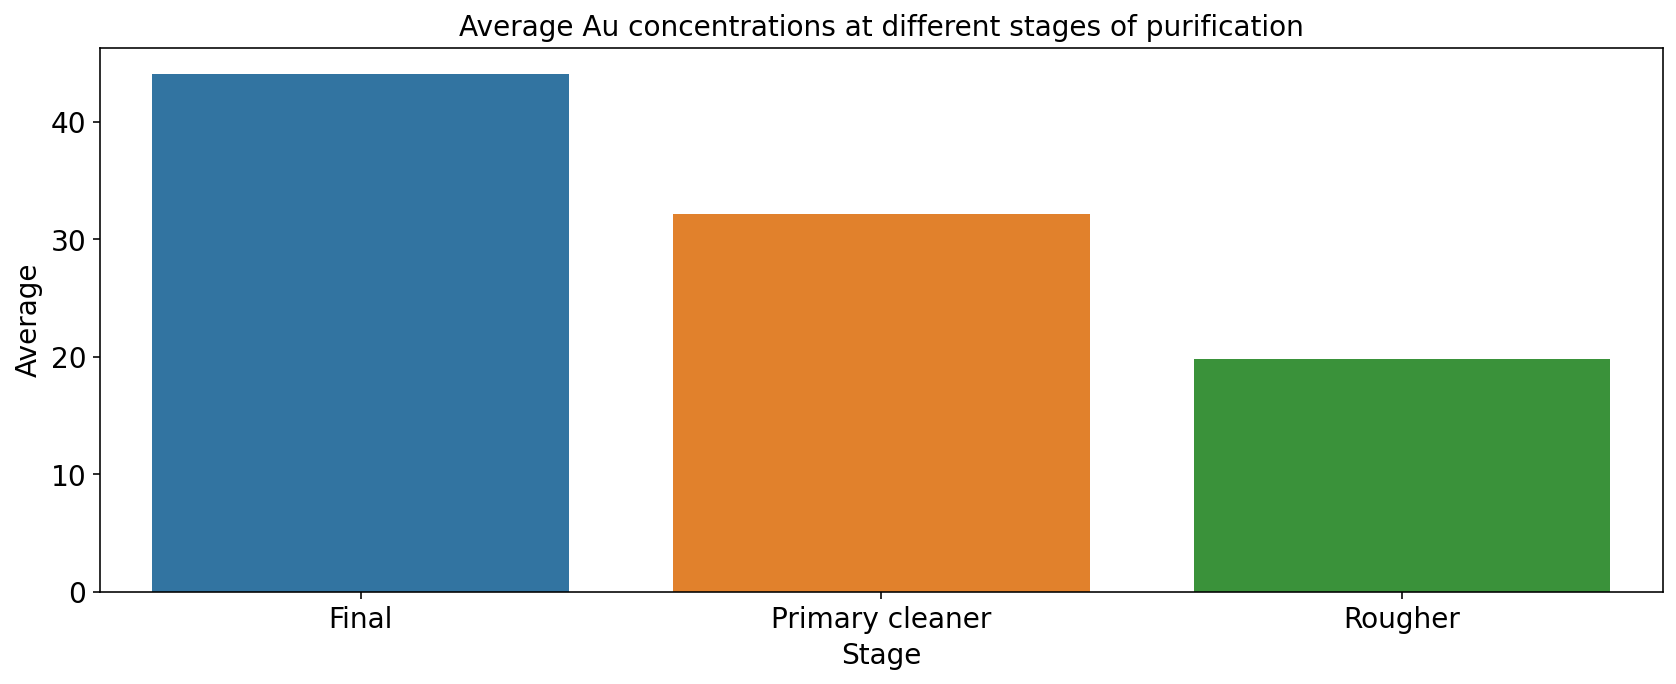

In [42]:
# calculating the average
au_concentration_mean = au_concentration_df.mean()
au_concentration_df_mean = pd.DataFrame({'stage': ['Final','Primary cleaner','Rougher'], 'mean':au_concentration_mean}).reset_index(drop=True)
display(au_concentration_df_mean)
# рисуем график
drawPlot(au_concentration_df_mean,'stage', 'mean', 'Stage', 'Average','Average Au concentrations at different stages of purification', order_by='stage')

The average *gold* concentration level increases at each stage of the process. If we compare the *final stage* and the *flotation stage*, the **average concentration has doubled**. Now let's look at the distributions.

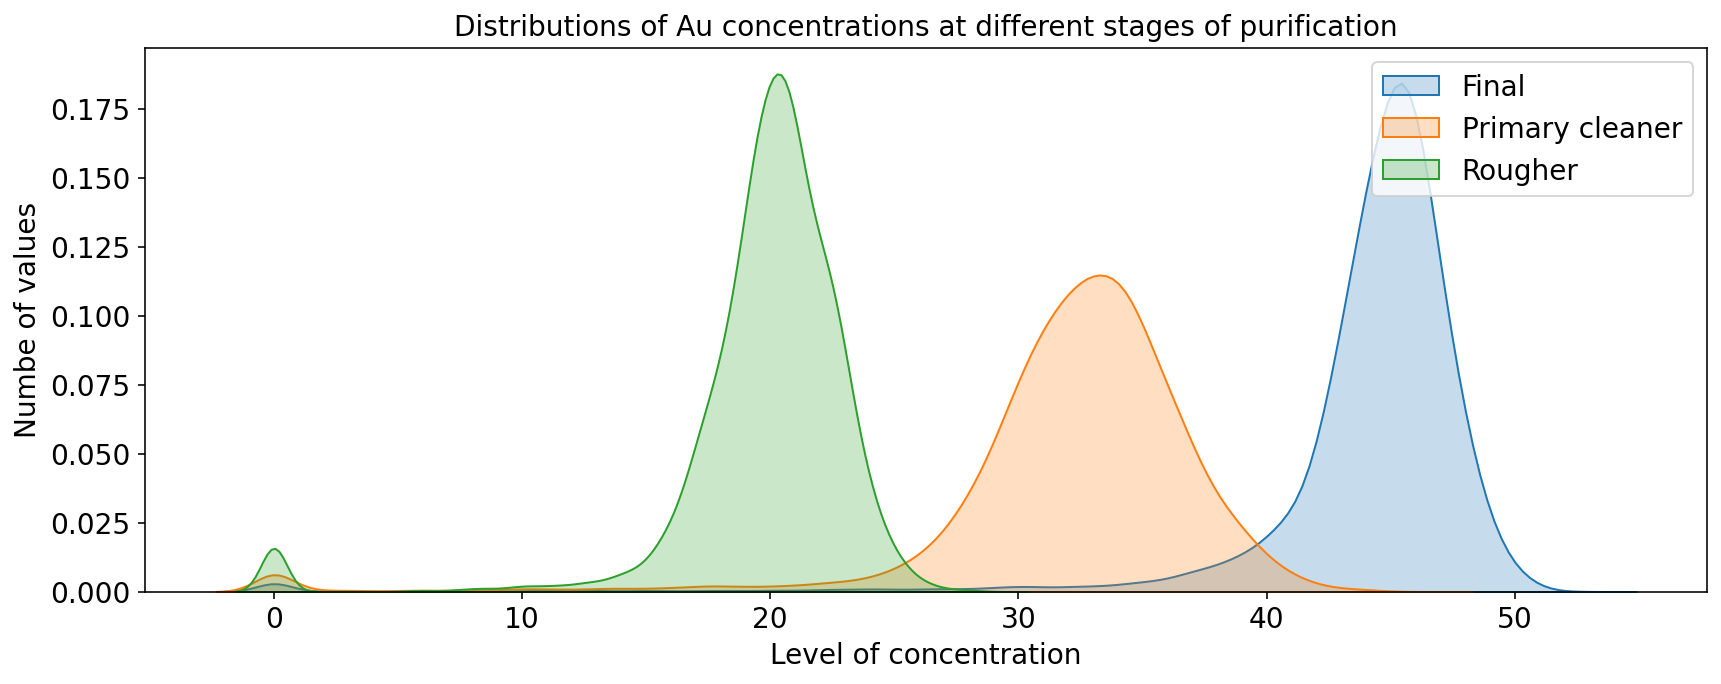

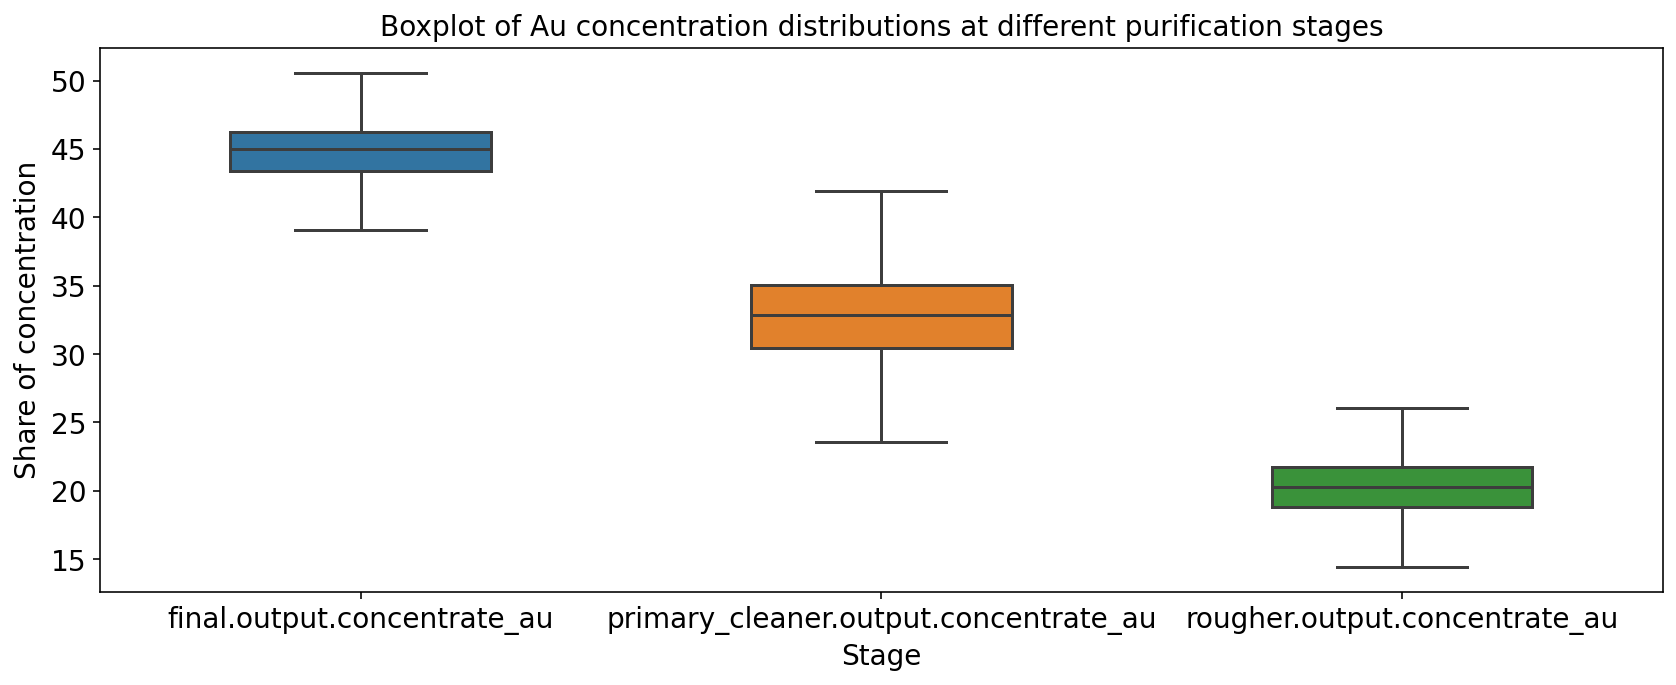

In [43]:
# Lables dictionary
labels_columns = {
    'Final': 'final.output.concentrate_au',
    'Primary cleaner': 'primary_cleaner.output.concentrate_au',
    'Rougher': 'rougher.output.concentrate_au'
}
# displaying distribution
drawDistributionPlot(au_concentration_df,labels_columns, "Distributions of Au concentrations at different stages of purification","Level of concentration", "Numbe of values")
# displaying boxplot
drawBoxPlot(au_concentration_df,'Boxplot of Au concentration distributions at different purification stages', 'Stage', 'Share of concentration')

We see on the graphs that the concentration of *gold* increases after each step. We also notice that we have values where the concentration is 0. Let's look at the other metals.

<a id="ag_concentration"></a>
## Ag concentration analysis

Let's look at the *Ag* concentration.

In [44]:
ag_concentration = []
for column in gold_recovery_full.columns:
    if ('ag' in column) and ('concentrate' in column):
        ag_concentration.append(column)
ag_concentration

['final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.concentrate_ag']

In [45]:
ag_concentration_df = gold_recovery_full[ag_concentration]
ag_concentration_df.head()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
date,,,
2016-01-15 00:00:00,6.055,8.548,11.501
2016-01-15 01:00:00,6.029,8.559,11.616
2016-01-15 02:00:00,6.056,8.604,11.696
2016-01-15 03:00:00,6.048,7.222,11.915
2016-01-15 04:00:00,6.149,9.089,12.411


Посмотрим на средние значения по каждому этапу

,stage,mean
0,Final,5.168
1,Primary cleaner,8.442
2,Rougher,11.995


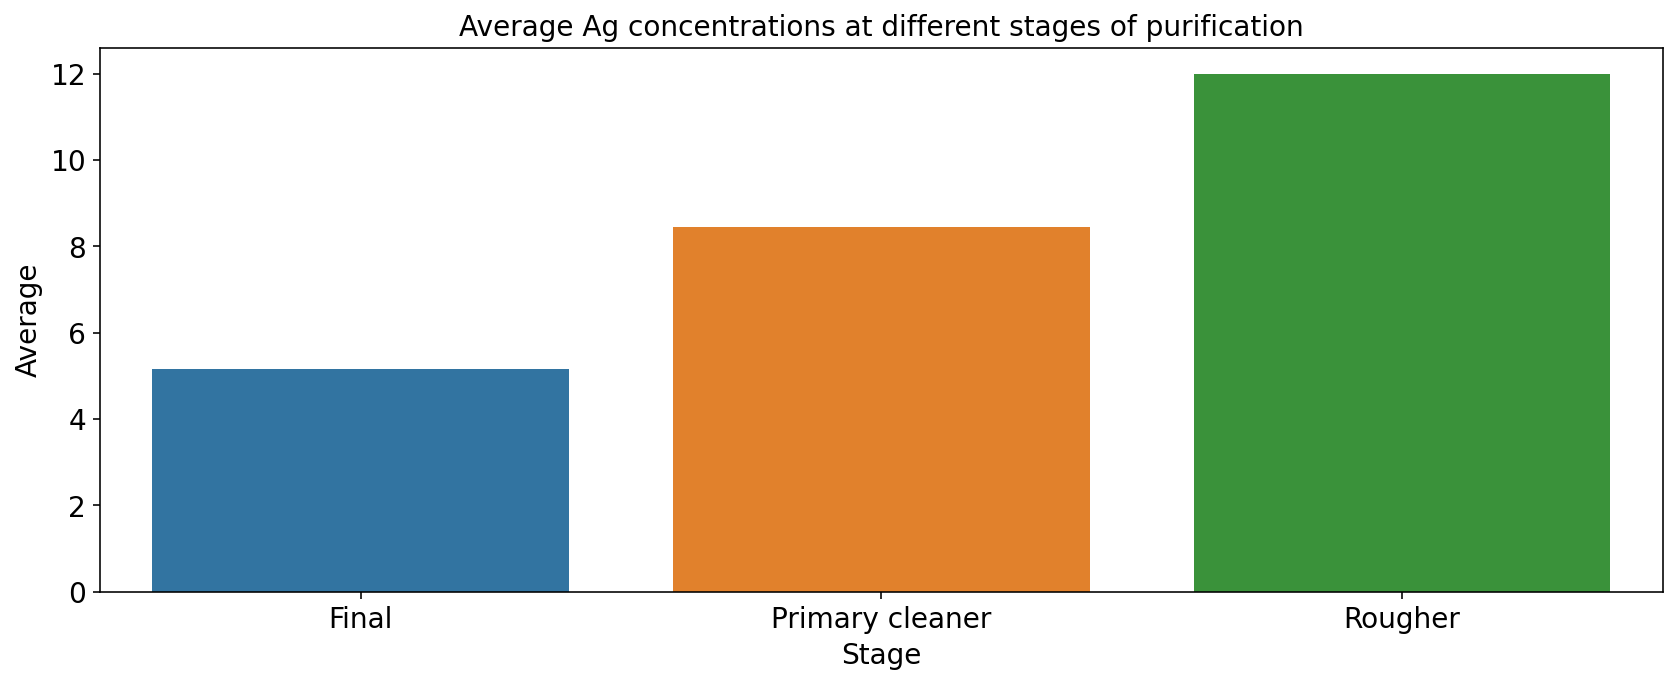

In [46]:
# calculating the average
ag_concentration_mean = ag_concentration_df.mean()
ag_concentration_df_mean = pd.DataFrame({'stage': ['Final','Primary cleaner','Rougher'], 'mean':ag_concentration_mean}).reset_index(drop=True)
display(ag_concentration_df_mean)
drawPlot(ag_concentration_df_mean,'stage', 'mean', 'Stage', 'Average','Average Ag concentrations at different stages of purification', order_by='stage')

Here the situation is the opposite. The *silver* concentration level is decreasing.  If we compare the *final stage* and the *flotation stage*, the **average concentration value has decreased by twice**.Let's look at the distributions.

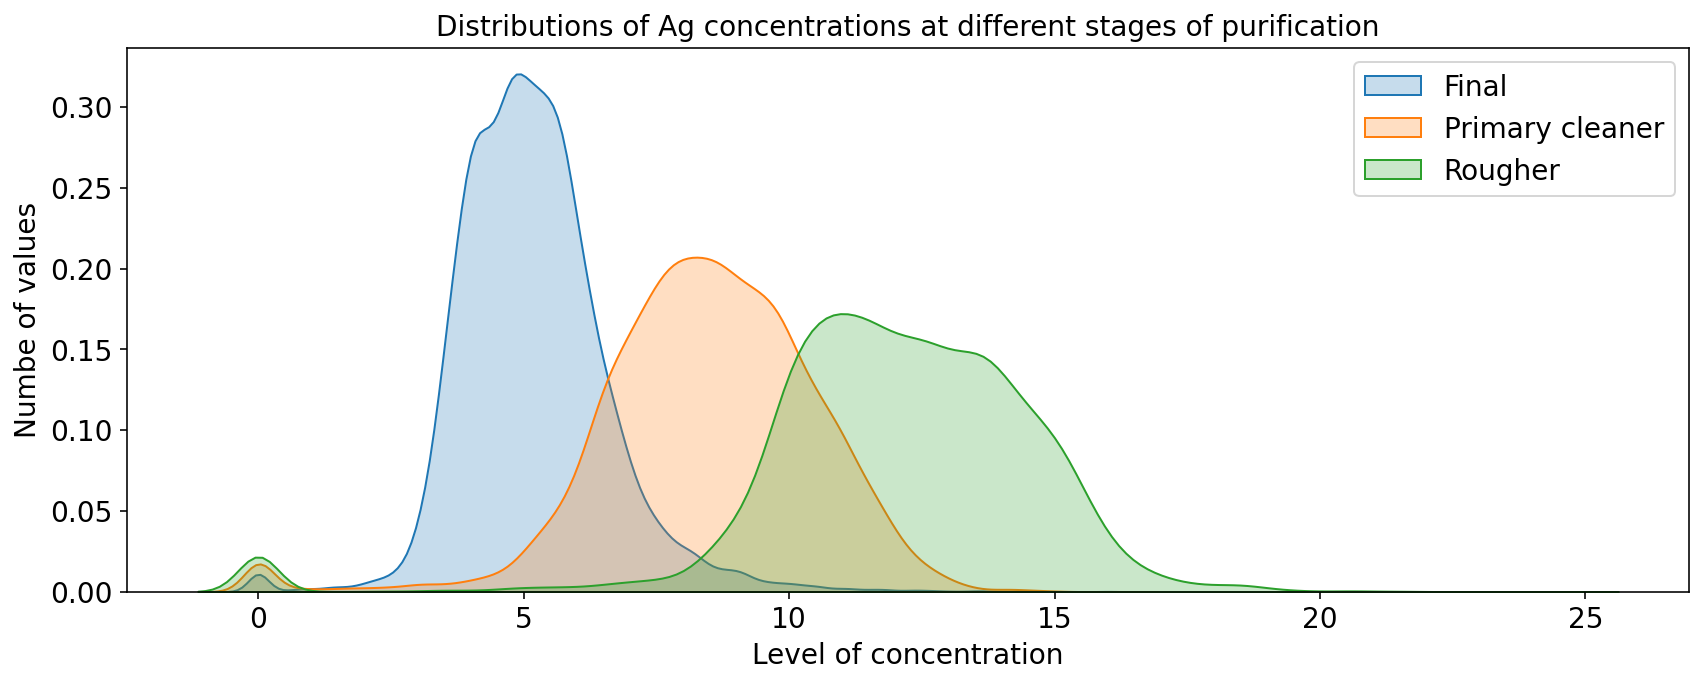

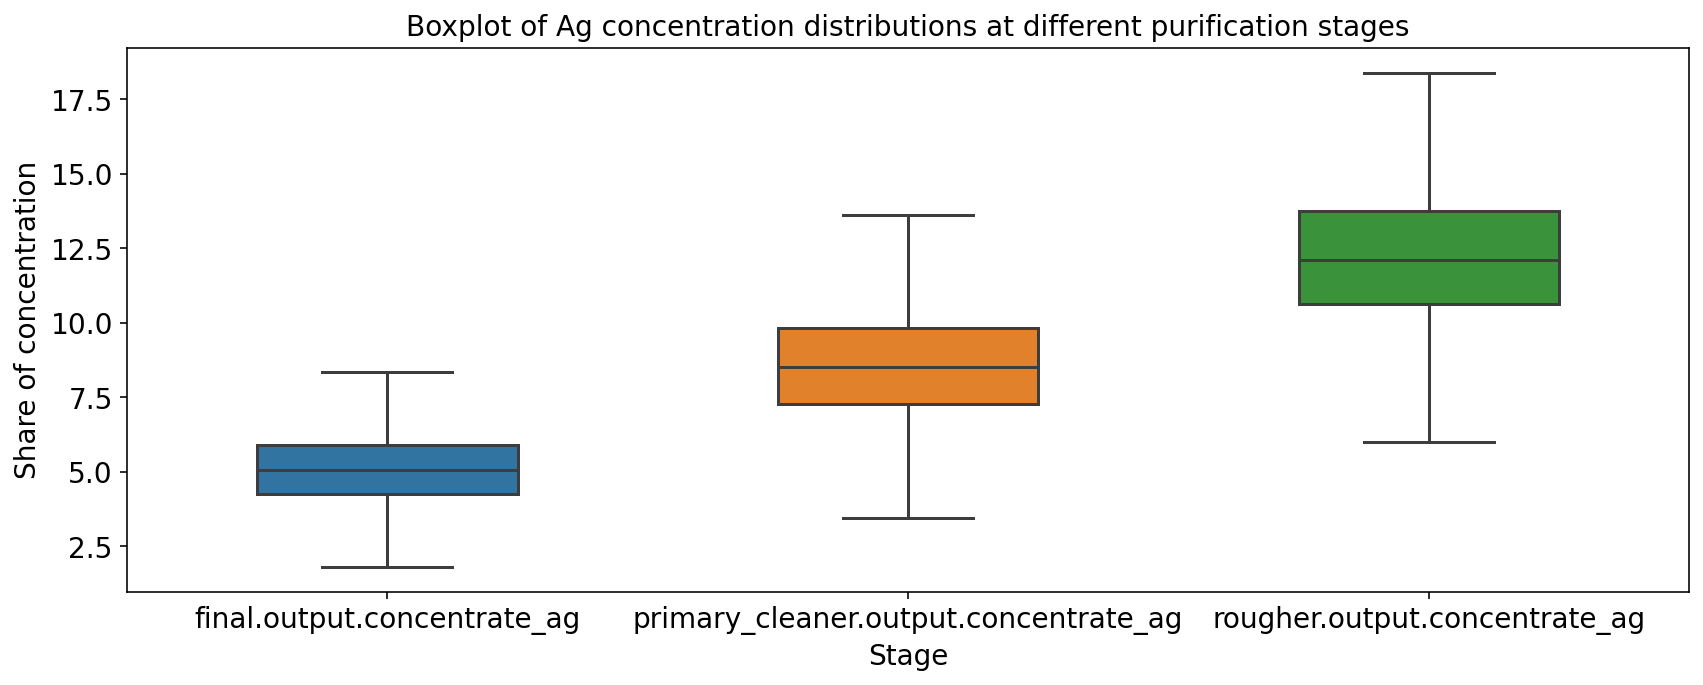

In [47]:
# label dictionary
labels_columns = {
    'Final': 'final.output.concentrate_ag',
    'Primary cleaner': 'primary_cleaner.output.concentrate_ag',
    'Rougher': 'rougher.output.concentrate_ag'
}
# рисуем график distribution
drawDistributionPlot(ag_concentration_df,labels_columns, "Distributions of Ag concentrations at different stages of purification","Level of concentration", "Numbe of values")
# рисуем график boxplot
drawBoxPlot(ag_concentration_df,'Boxplot of Ag concentration distributions at different purification stages', 'Stage', 'Share of concentration')

We see the same in the distribution graphs. The concentration level decreases at each step. Also notice that we have values where the concentration is 0. 

<a id="pb_concentration"></a>
## Pb concentration analysis

Let's look at the level of *Pb* concentration at different stages of the technological process.

In [48]:
pb_concentration = []
for column in gold_recovery_full.columns:
    if ('pb' in column) and ('concentrate' in column):
        pb_concentration.append(column)
pb_concentration

['final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_pb']

In [49]:
pb_concentration_df = gold_recovery_full[pb_concentration]
pb_concentration_df.head()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
date,,,
2016-01-15 00:00:00,9.890,10.390,7.101
2016-01-15 01:00:00,9.969,10.497,7.279
2016-01-15 02:00:00,10.214,10.354,7.217
2016-01-15 03:00:00,9.977,8.497,7.176
2016-01-15 04:00:00,10.143,9.987,7.240


Let's look at the average for each stage.

,stage,mean
0,Final,9.979
1,Primary cleaner,9.810
2,Rougher,7.606


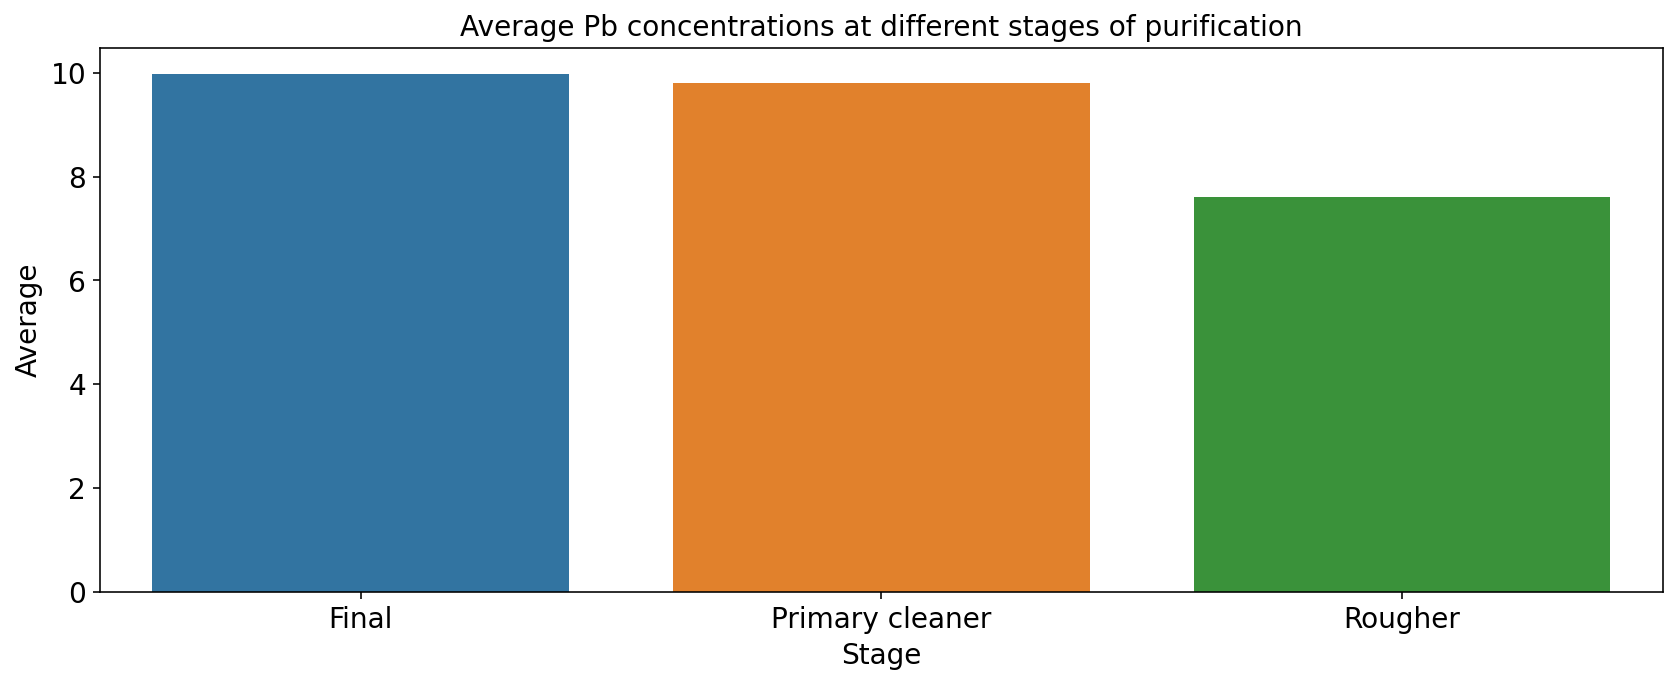

In [50]:
# calculate the average
pb_concentration_mean = pb_concentration_df.mean()
pb_concentration_df_mean = pd.DataFrame({'stage': ['Final','Primary cleaner','Rougher'], 'mean':pb_concentration_mean}).reset_index(drop=True)
display(pb_concentration_df_mean)
drawPlot(pb_concentration_df_mean,'stage', 'mean', 'Stage', 'Average','Average Pb concentrations at different stages of purification', order_by='stage')

The average concentration in the *final stage* and the *primary purification stage* is almost the same. The average has increased compared to the *flotation* stage. If we compare the *final stage* and the *flotation stage*, the **average concentration has increased by two values**. Let's look at the distribution.

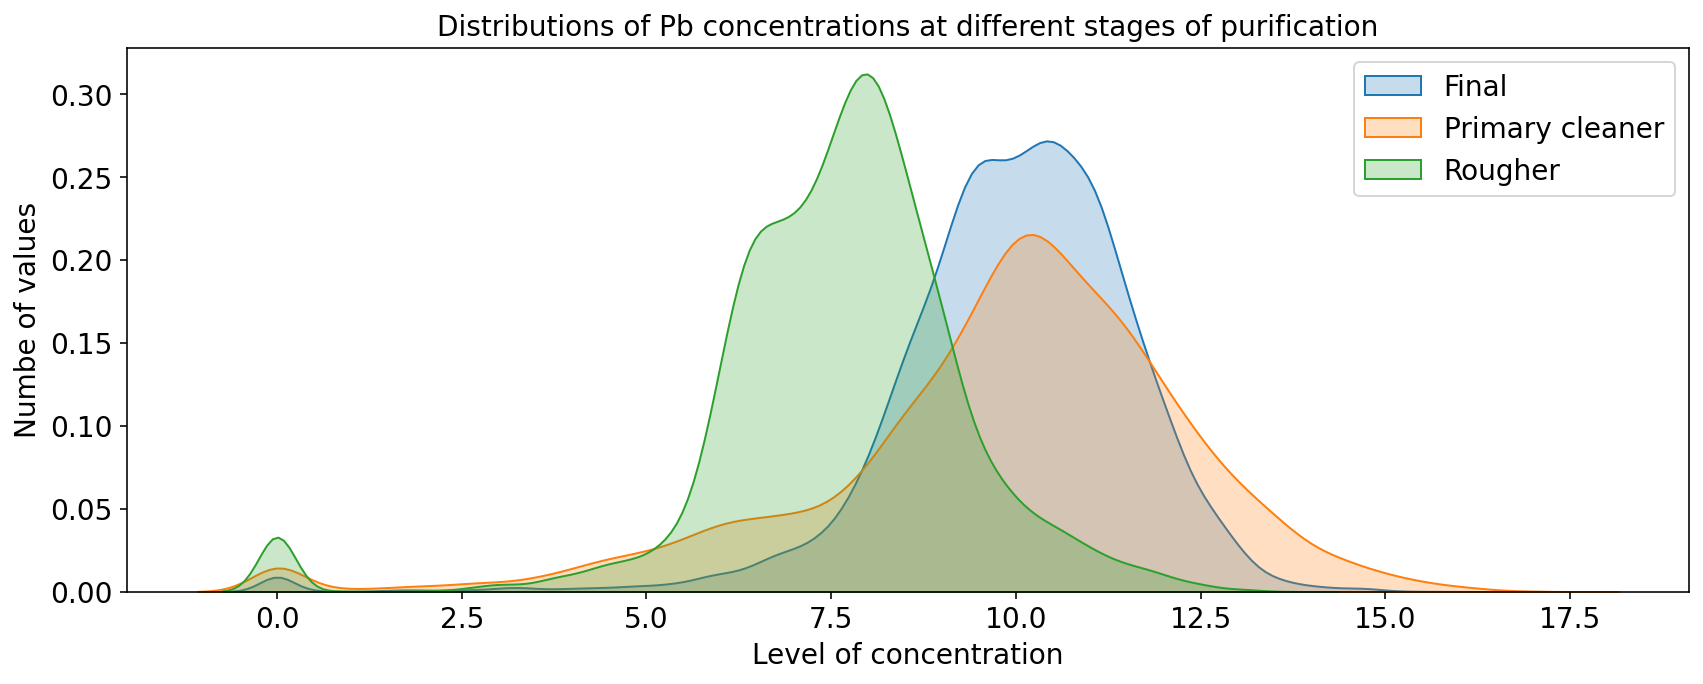

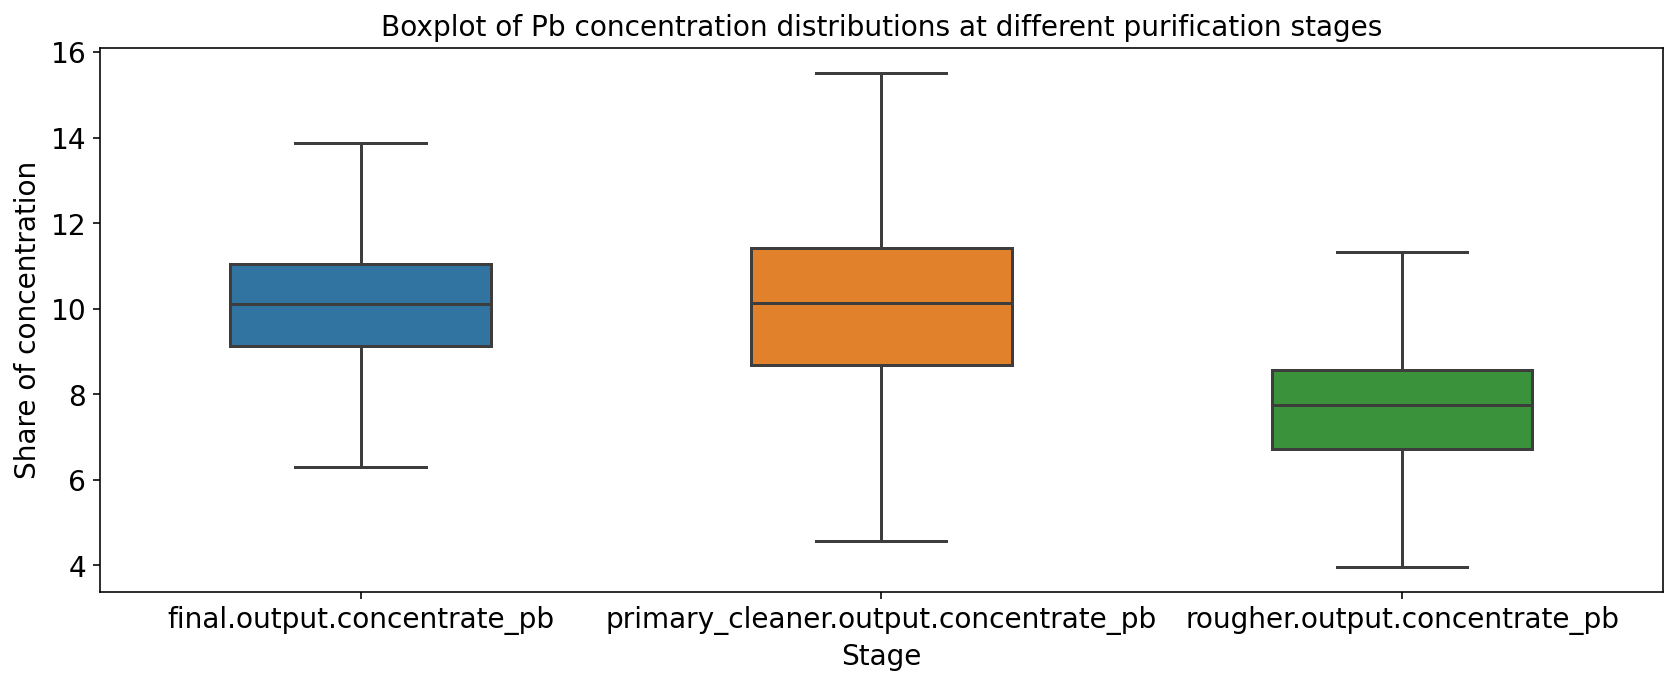

In [51]:
# labels dictionary
labels_columns = {
    'Final': 'final.output.concentrate_pb',
    'Primary cleaner': 'primary_cleaner.output.concentrate_pb',
    'Rougher': 'rougher.output.concentrate_pb'
}
# displaying distribution
drawDistributionPlot(pb_concentration_df,labels_columns,  "Distributions of Pb concentrations at different stages of purification","Level of concentration", "Numbe of values")
# displaying boxplot
drawBoxPlot(pb_concentration_df,'Boxplot of Pb concentration distributions at different purification stages', 'Stage', 'Share of concentration')

As you can see in the graphs, the values of the *final stage* and the *primary cleaner stage* are distributed almost in the same interval.

## Summary

Metal concentration analysis:
1. Gold (Au):
    - The *gold* average concentration level has increased at each stage of the process. If you compare the *final stage* and the *flotation stage*, the **average concentration has doubled**.
    - On the distribution graph, the *gold* concentration increases after each step. Also note that we have values where the concentration is 0.
2. Silver (Ag):
    - This is where the situation is reversed. The *silver* concentration level is decreasing. If we compare the *final stage* and the *flotation stage*, the **average concentration value has decreased by 2 times**.
    - We see the same in the distribution graphs. The concentration level drops with each stage. Also notice that we have values where the concentration is 0.
3. Lead (Pb):
    - The average concentration values in the *final stage* and the *primary cleanup stage* are almost the same. The average has increased compared to the *flotation* stage. If we compare the *final stage* and the *flotation stage*, the **average concentration has increased by two values**. Also note that we have values where the concentration is 0.
    - In the distribution plots, the *final stage* and *primary cleaner stage* values are distributed almost in the same gap.
    
Let's move on to the distributions of the size of the raw material granules.

<a id="distributionComparisonMaterial"></a>
## Comparison of raw material grain size distribution on the training and test sample

It is necessary to compare the distribution of raw material granule sizes on the training and test samples. If the distributions are very different from each other, the model estimation will be incorrect.

In [52]:
train_feed_size = []
for column in gold_recovery_train.columns:
    if 'feed_size' in column:
        train_feed_size.append(column)
train_feed_size

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [53]:
test_feed_size = []
for column in gold_recovery_test.columns:
    if 'feed_size' in column:
        test_feed_size.append(column)
test_feed_size

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [54]:
train_feed_size_df = gold_recovery_train[train_feed_size].reset_index(drop=True)
test_feed_size_df = gold_recovery_test[test_feed_size].reset_index(drop=True)
display(train_feed_size_df.head())
print()
display(test_feed_size_df.head())

,primary_cleaner.input.feed_size,rougher.input.feed_size
0,7.250,55.487
1,7.250,57.279
2,7.250,57.511
3,7.250,57.793
4,7.250,56.047


,primary_cleaner.input.feed_size,rougher.input.feed_size
0,8.080,62.710
1,8.080,61.961
2,7.787,66.904
3,7.640,59.866
4,7.530,63.315


Begin with Rougher stage

<a id="rougherStage"></a>
## Rougher stage

Display distributions 

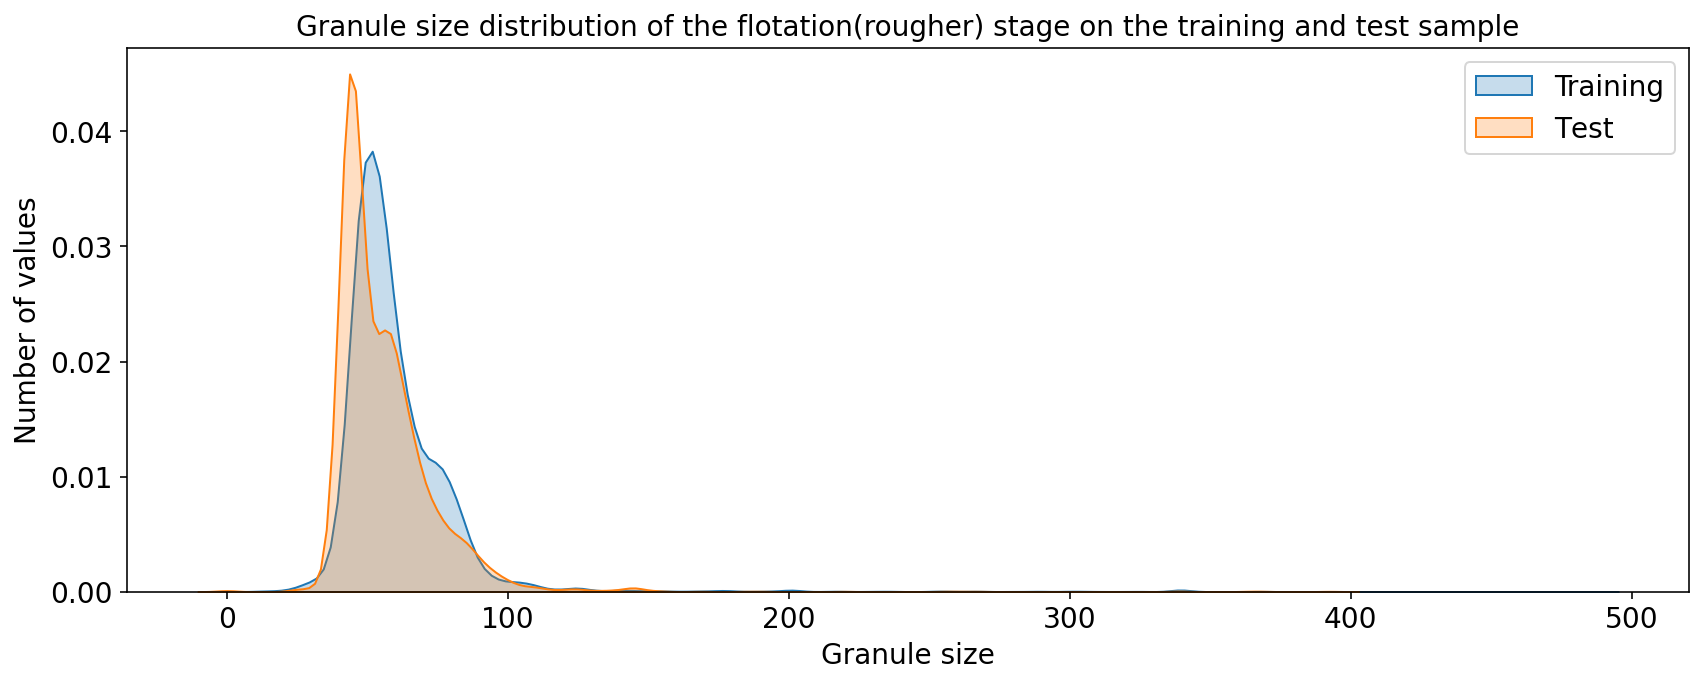

In [55]:
sns.kdeplot(data=train_feed_size_df['rougher.input.feed_size'], label='Training',shade=True)
sns.kdeplot(data=test_feed_size_df['rougher.input.feed_size'], label='Тest',shade=True)
plt.title("Granule size distribution of the flotation(rougher) stage on the training and test sample")
plt.legend()
plt.xlabel('Granule size')
plt.ylabel('Number of values')
plt.show()

Как видим на графике, распределения похожи. Построим графики *boxplot*.

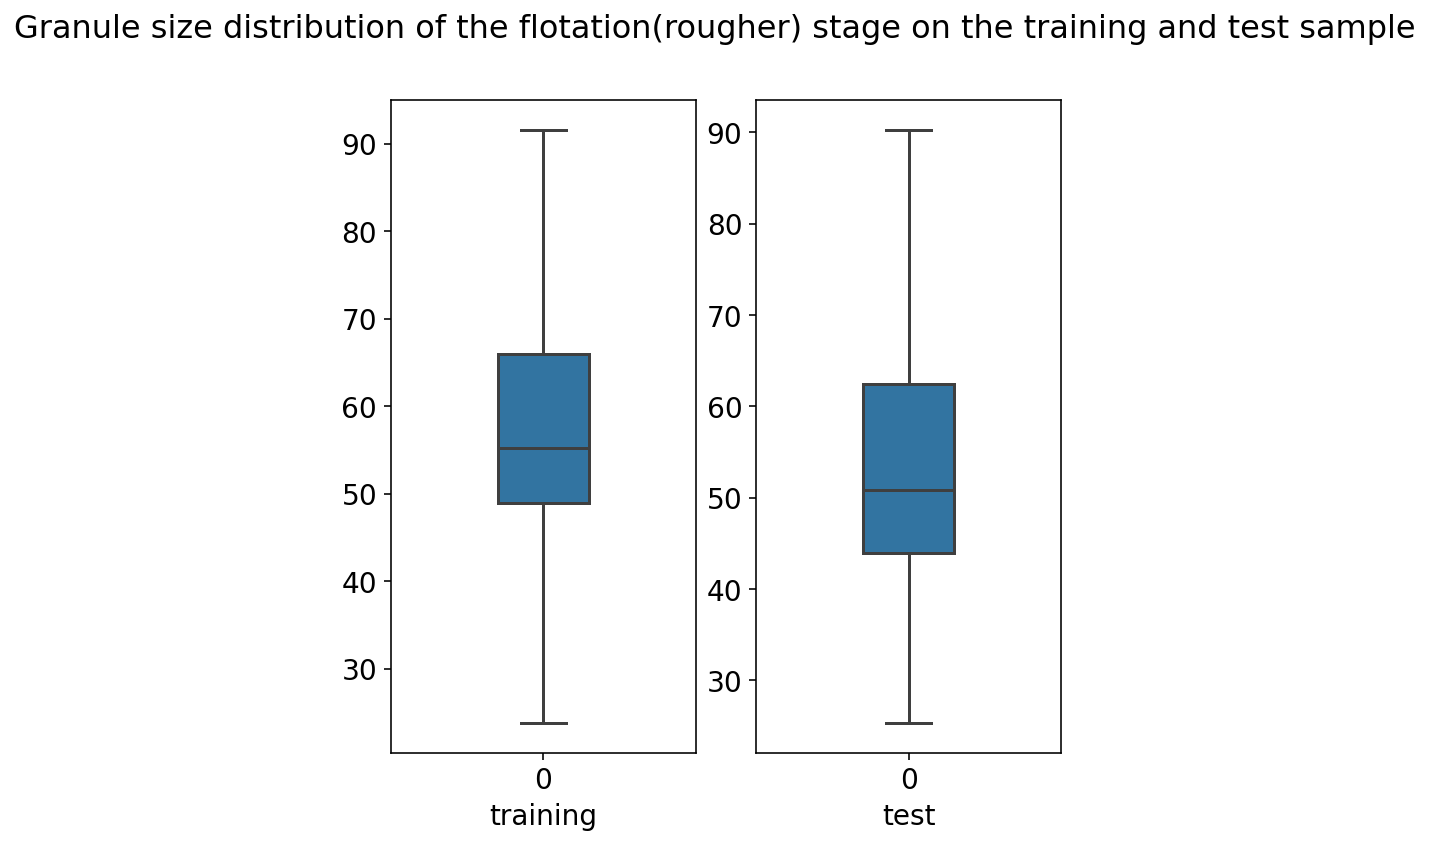

In [56]:
fig, axes = plt.subplots(1,2,figsize=(6,6))
sns.boxplot(data=train_feed_size_df['rougher.input.feed_size'],ax=axes[0],width=0.3,showfliers=False)
axes[0].set_xlabel('training')
sns.boxplot(data=test_feed_size_df['rougher.input.feed_size'],ax=axes[1],width=0.3,showfliers=False)
axes[1].set_xlabel('test')
plt.suptitle("Granule size distribution of the flotation(rougher) stage on the training and test sample")
plt.show()

Boxplots are almost similar. The mean values fall within the range of the boxes. Let's perform a statistical *t-test* "*Student*". 

It is necessary to first check for homogeneity of variances from the obtained samples. Let us use Levene's test. We formulate the null hypothesis H₀ in Levene's test **"both samples have the same variance "**.  Based on H₀ we formulate the alternative hypothesis H₁ **"the variance between the samples is different "**.

In [57]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.levene(train_feed_size_df['rougher.input.feed_size'],test_feed_size_df['rougher.input.feed_size'],center='mean')
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Rejecting the null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 0.10568069200950223
Impossible to reject the null hypothesis


Both samples have the same variance.

Let us formulate the null hypothesis H₀ in the *t-test* "*Student*". **"both samples have the same distribution "**. Based on H₀ we formulate the alternative hypothesis H₁ **"both samples have a different distribution "**.

In [58]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.ttest_ind(train_feed_size_df['rougher.input.feed_size'], test_feed_size_df['rougher.input.feed_size'],equal_var=True)
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Rejecting the null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 1.6081245670847274e-33
Rejecting the null hypothesis


<a id="primaryCleaner_stage"></a>
## Primary cleaner stage

Let's plot the distributions.

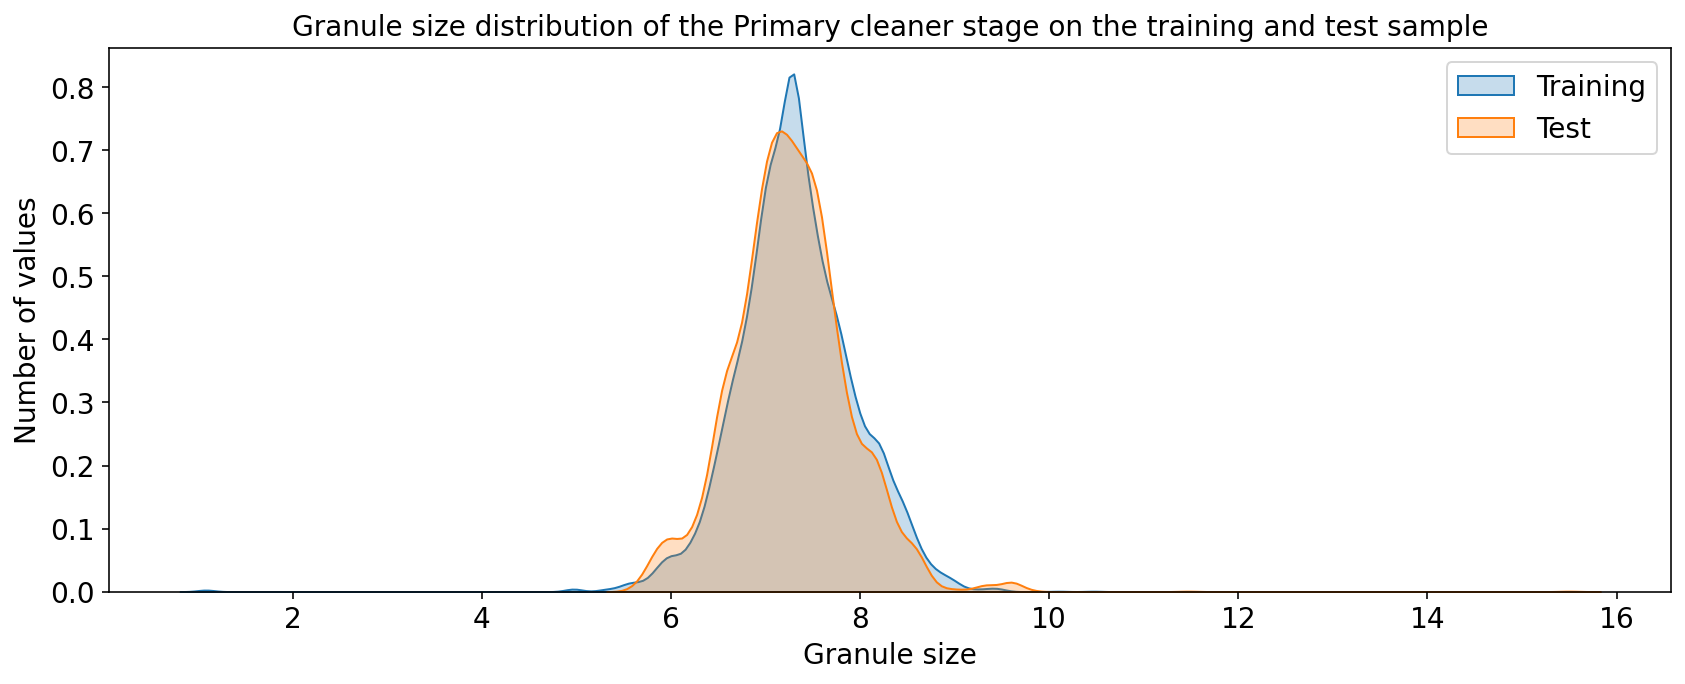

In [59]:
sns.kdeplot(data=train_feed_size_df['primary_cleaner.input.feed_size'], label='Training',shade=True)
sns.kdeplot(data=test_feed_size_df['primary_cleaner.input.feed_size'], label='Test',shade=True)
plt.title("Granule size distribution of the Primary cleaner stage on the training and test sample")
plt.legend()
plt.legend()
plt.xlabel('Granule size')
plt.ylabel('Number of values')
plt.show()

As you can see on the graph, the distribution of raw material granule sizes after the primary cleaning stage is similar. Let's build graphs *boxplot*.

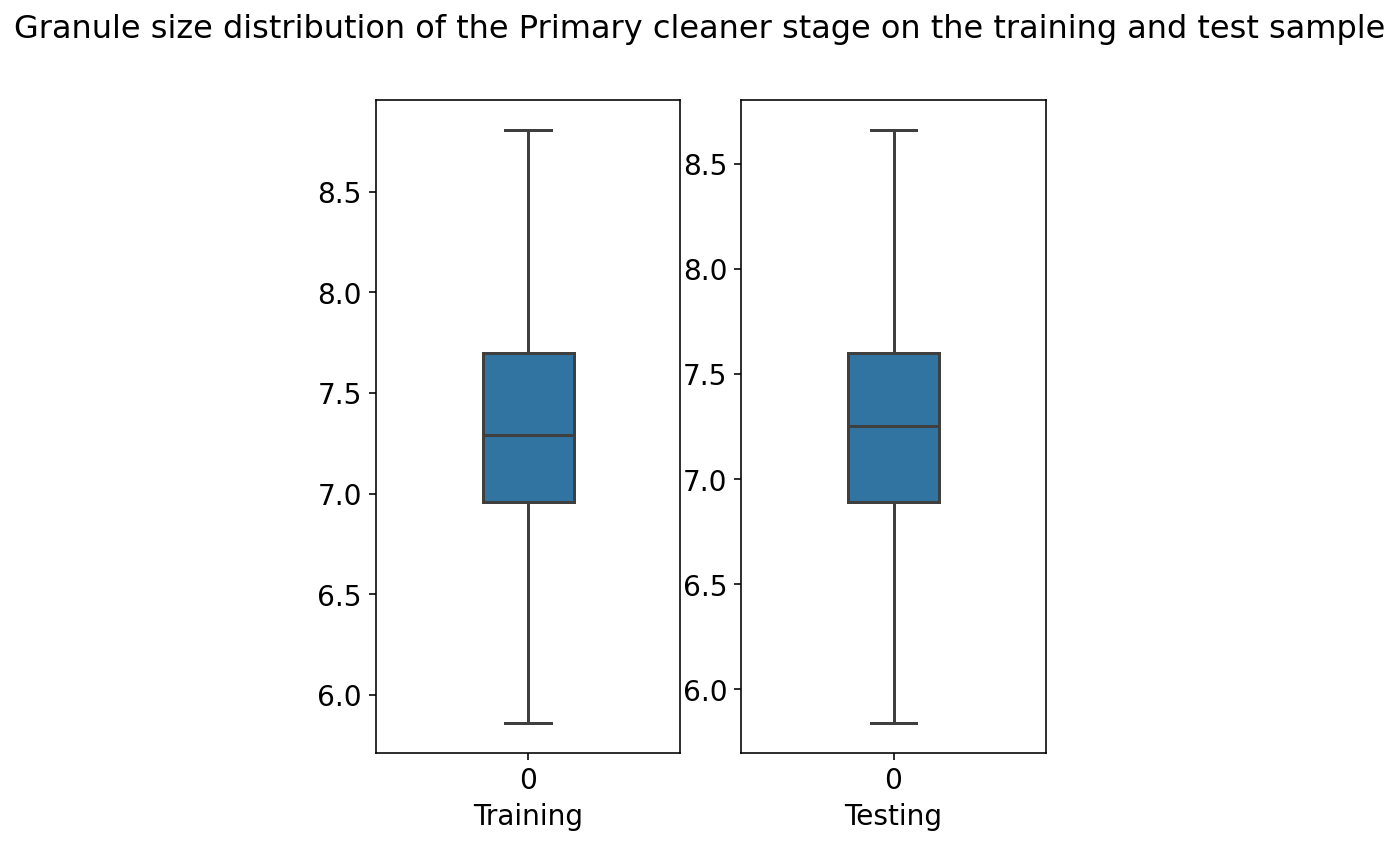

In [60]:
fig, axes = plt.subplots(1,2,figsize=(6,6))
sns.boxplot(data=train_feed_size_df['primary_cleaner.input.feed_size'],ax=axes[0],width=0.3,showfliers=False)
axes[0].set_xlabel('Training')
sns.boxplot(data=test_feed_size_df['primary_cleaner.input.feed_size'],ax=axes[1],width=0.3,showfliers=False)
axes[1].set_xlabel('Testing')
plt.suptitle("Granule size distribution of the Primary cleaner stage on the training and test sample")
plt.show()

The *Boxplots* are similar. The average values fall within the range of the boxes.

Let's carry out statistical *KS* test "*Kolmogorov and Smirnov*". It is necessary first to check for homogeneity of variances from the obtained samples. We will use Levene's test. Let us formulate the null hypothesis H₀ in Levene's test **"both samples have the same variance "**.  Based on H₀ we formulate the alternative hypothesis H₁ **"the variance in the samples is different "**.

In [61]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.levene(train_feed_size_df['primary_cleaner.input.feed_size'],test_feed_size_df['primary_cleaner.input.feed_size'],center='mean')
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Rejecting the null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 0.9314354157397963
Impossible to reject the null hypothesis


both samples have the same variance.

Let us formulate the null hypothesis H₀ in the K-S test "*Kolmogorov and Smirnov **"both samples have the same distribution "**. Based on H₀ we formulate the alternative hypothesis H₁ **"both samples have a different distribution "**.

In [62]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.ttest_ind(train_feed_size_df['rougher.input.feed_size'], test_feed_size_df['rougher.input.feed_size'],equal_var=True)
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Rejecting the null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 1.6081245670847274e-33
Rejecting the null hypothesis


## Summary

Based on the graphs of the distribution of granule sizes on the raw material at the *flotation*,*primary cleaner* stages, we can say that the distributions are not very different from each other. Consequently, the data look good for the models. 

<br>

<a id="researchSubstancesConcentration"></a>
## Substances concentration research

It is necessary to investigate the total concentration of all substances at different stages: In the *raw*,*rougher*,and *final concentrates*. 

## Stage - raw material

In [63]:
rougherInputColumns = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']
rougher_input_concentration  = gold_recovery_full[rougherInputColumns]
rougher_input_concentration['sum'] = rougher_input_concentration.iloc[:,0] + rougher_input_concentration.iloc[:,1] + rougher_input_concentration.iloc[:,2] + rougher_input_concentration.iloc[:,3]
gold_recovery_full['rougher_input_sum'] = rougher_input_concentration['sum']
rougher_input_concentration.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,sum
date,,,,,
2016-01-15 00:00:00,6.100,2.285,36.809,6.486,51.680
2016-01-15 01:00:00,6.161,2.266,35.753,6.479,50.659
2016-01-15 02:00:00,6.116,2.160,35.972,6.362,50.610
2016-01-15 03:00:00,6.043,2.038,36.862,6.118,51.062
2016-01-15 04:00:00,6.061,1.787,34.348,5.664,47.859


## Stage - rougher concentration

In [64]:
rougherOutputColumns = [ 'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au']
rougher_output_concentration = gold_recovery_full[rougherOutputColumns]
rougher_output_concentration['sum'] = rougher_output_concentration.iloc[:,0] + rougher_output_concentration.iloc[:,1] + rougher_output_concentration.iloc[:,2] + rougher_output_concentration.iloc[:,3]
gold_recovery_full['rougher_output_sum'] = rougher_output_concentration['sum']
rougher_output_concentration.head()

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,sum
date,,,,,
2016-01-15 00:00:00,11.501,7.101,28.029,19.794,66.425
2016-01-15 01:00:00,11.616,7.279,28.067,20.051,67.013
2016-01-15 02:00:00,11.696,7.217,27.454,19.737,66.104
2016-01-15 03:00:00,11.915,7.176,27.341,19.321,65.753
2016-01-15 04:00:00,12.411,7.240,27.041,19.216,65.908


## Stage - final concentration

In [65]:
finalOutputColumns = ['final.output.concentrate_ag', 'final.output.concentrate_pb','final.output.concentrate_sol', 'final.output.concentrate_au']
final_output_concentration = gold_recovery_full[finalOutputColumns]
final_output_concentration['sum'] = final_output_concentration.iloc[:,0] + final_output_concentration.iloc[:,1] + final_output_concentration.iloc[:,2] + final_output_concentration.iloc[:,3]
gold_recovery_full['final_output_sum'] = final_output_concentration['sum'] 
final_output_concentration.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,sum
date,,,,,
2016-01-15 00:00:00,6.055,9.890,5.507,42.192,63.644
2016-01-15 01:00:00,6.029,9.969,5.258,42.702,63.958
2016-01-15 02:00:00,6.056,10.214,5.384,42.658,64.311
2016-01-15 03:00:00,6.048,9.977,4.859,42.690,63.573
2016-01-15 04:00:00,6.149,10.143,4.939,42.774,64.005


Combine the resulting columns of the total concentration of all substances in one table.

In [66]:
sum_concentration_stages = pd.DataFrame({'rougher_input_sum': gold_recovery_full['rougher_input_sum'],
                                         'rougher_output_sum':gold_recovery_full['rougher_output_sum'],
                                         'final_output_sum':gold_recovery_full['final_output_sum']})

Let's plot the distributions

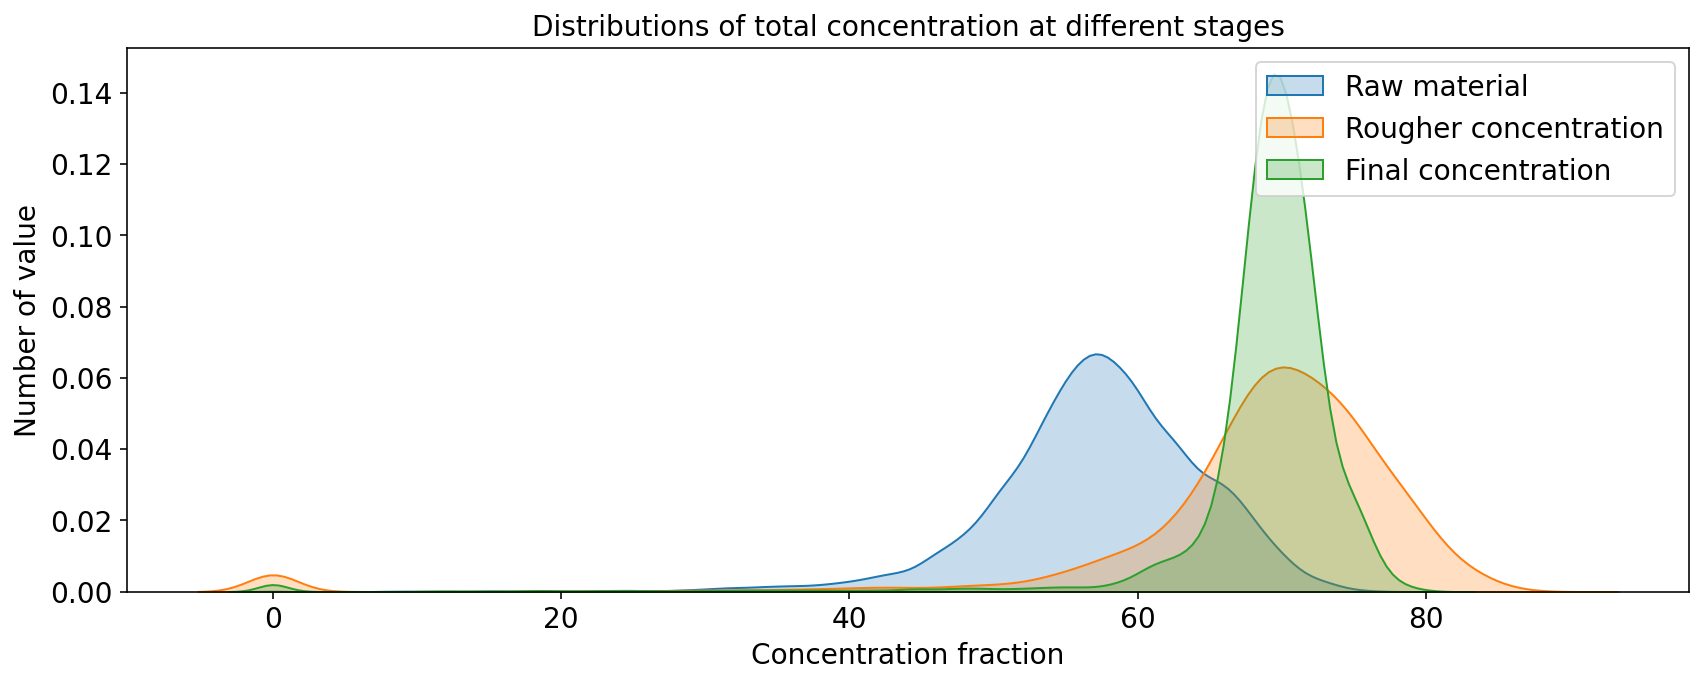

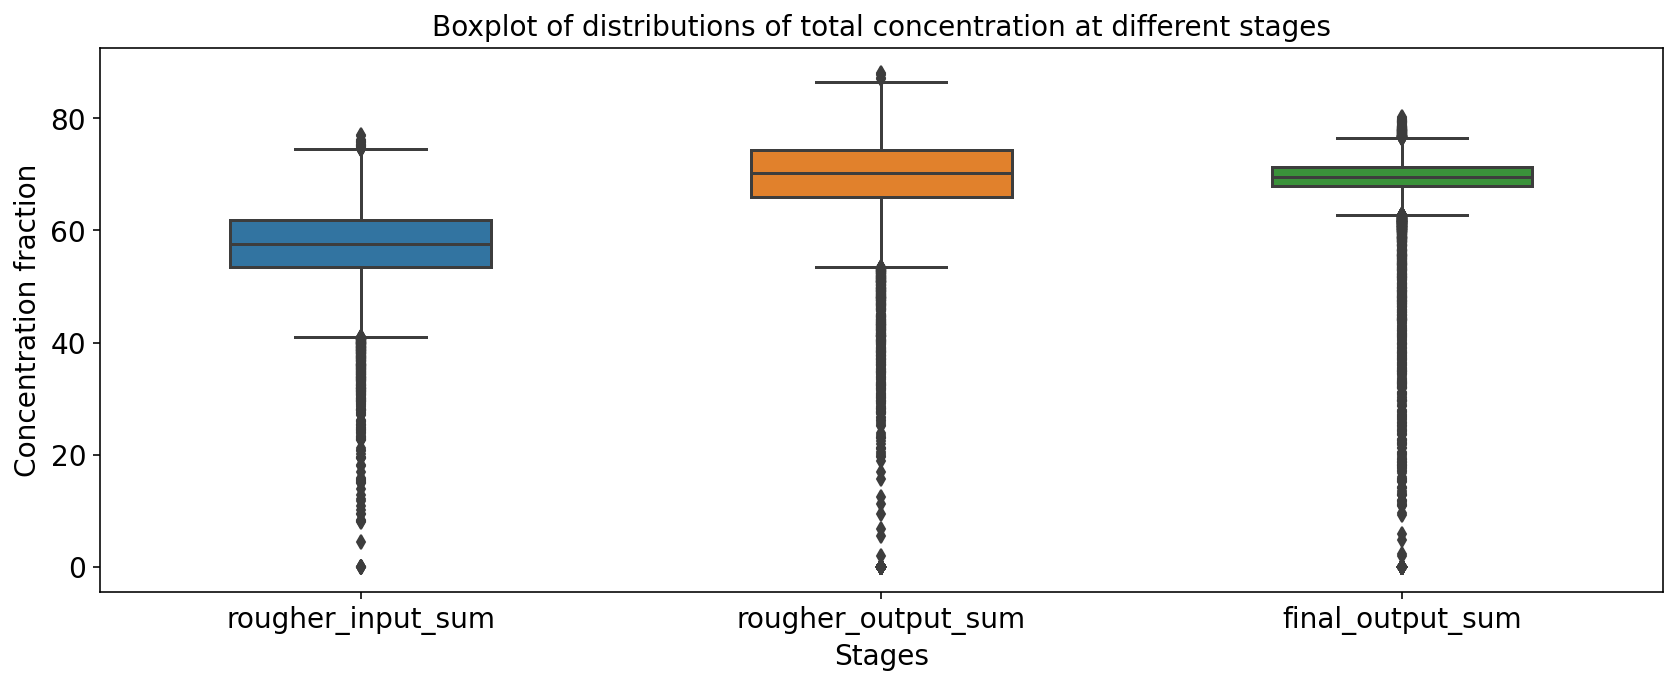

In [67]:
# Create dictionary
labels_columns = {
    'Raw material': 'rougher_input_sum',
    'Rougher concentration': 'rougher_output_sum',
    'Final concentration': 'final_output_sum'
}
# plot distribution graph
drawDistributionPlot(sum_concentration_stages,labels_columns, "Distributions of total concentration at different stages","Concentration fraction", "Number of value")
print()
# plot boxplot
drawBoxPlot(sum_concentration_stages,'Boxplot of distributions of total concentration at different stages', 'Stages', 'Concentration fraction',True)

As you can see in the graphs, we have outliers. Most of the values are in the range of 40 to 80.

Eliminate outliers. Outliers in the input data can distort and mislead machine learning algorithms, leading to lower model accuracy and, ultimately, worse results.

In [68]:
length_with_outliers = len(gold_recovery_full)
# removing 0
gold_recovery_full  = gold_recovery_full[(gold_recovery_full['final_output_sum'] > 0) & (gold_recovery_full['rougher_output_sum'] > 0) & (gold_recovery_full['rougher_input_sum'] > 0)]
# removing outliers in range Q3 + 1IQR
gold_recovery_full = gold_recovery_full[(gold_recovery_full['final_output_sum'] < 90) & (gold_recovery_full['rougher_output_sum'] < 90) & (gold_recovery_full['rougher_input_sum'] < 90)]
length_without_outliers = len(gold_recovery_full)
print(f'Data loss - {round(((length_with_outliers - length_without_outliers) / length_with_outliers) * 100,3)}%')

Data loss - 2.521%


In [69]:
sum_concentration_stages_upd = pd.DataFrame({'rougher_input_sum': gold_recovery_full['rougher_input_sum'],
                                         'rougher_output_sum':gold_recovery_full['rougher_output_sum'],
                                         'final_output_sum':gold_recovery_full['final_output_sum']})

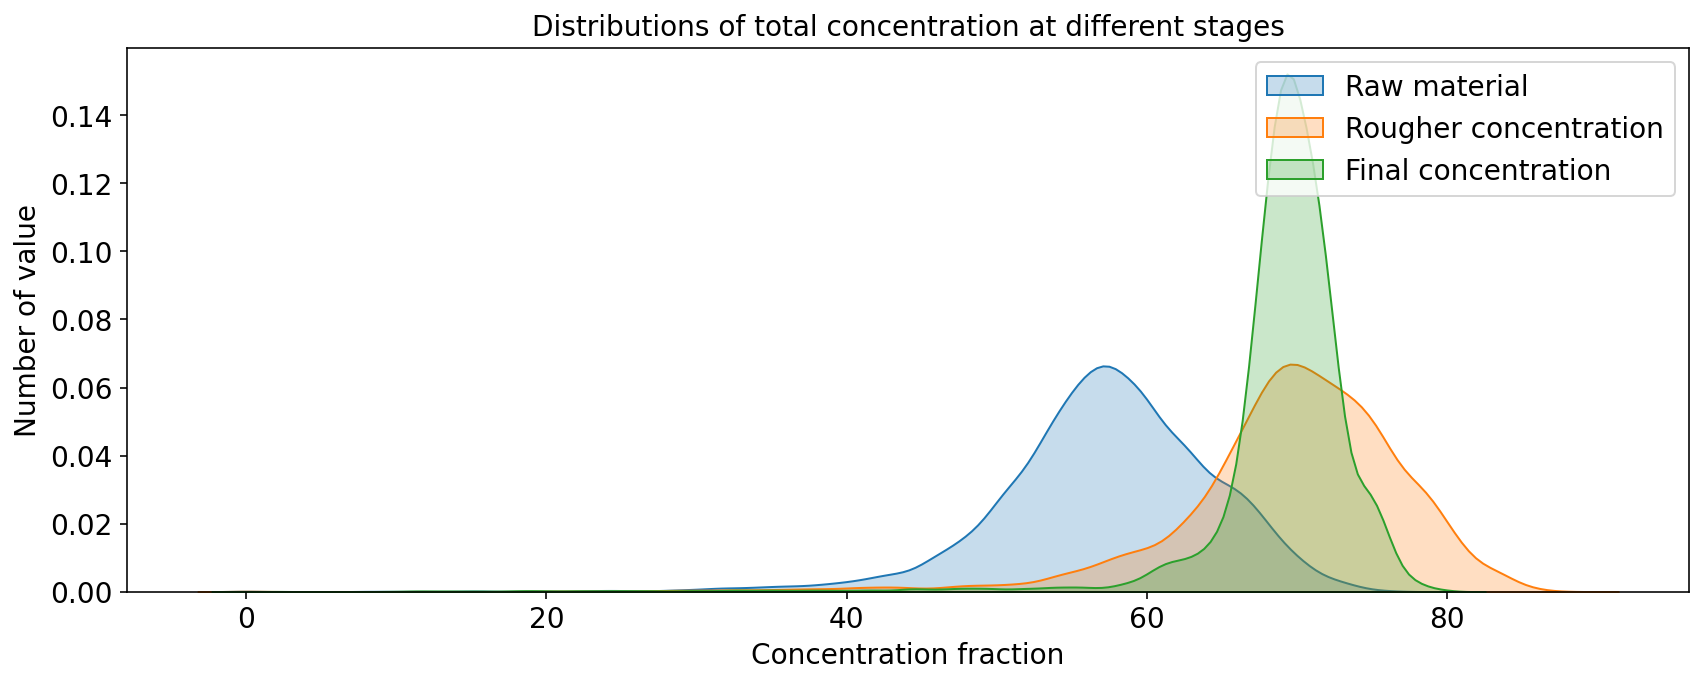

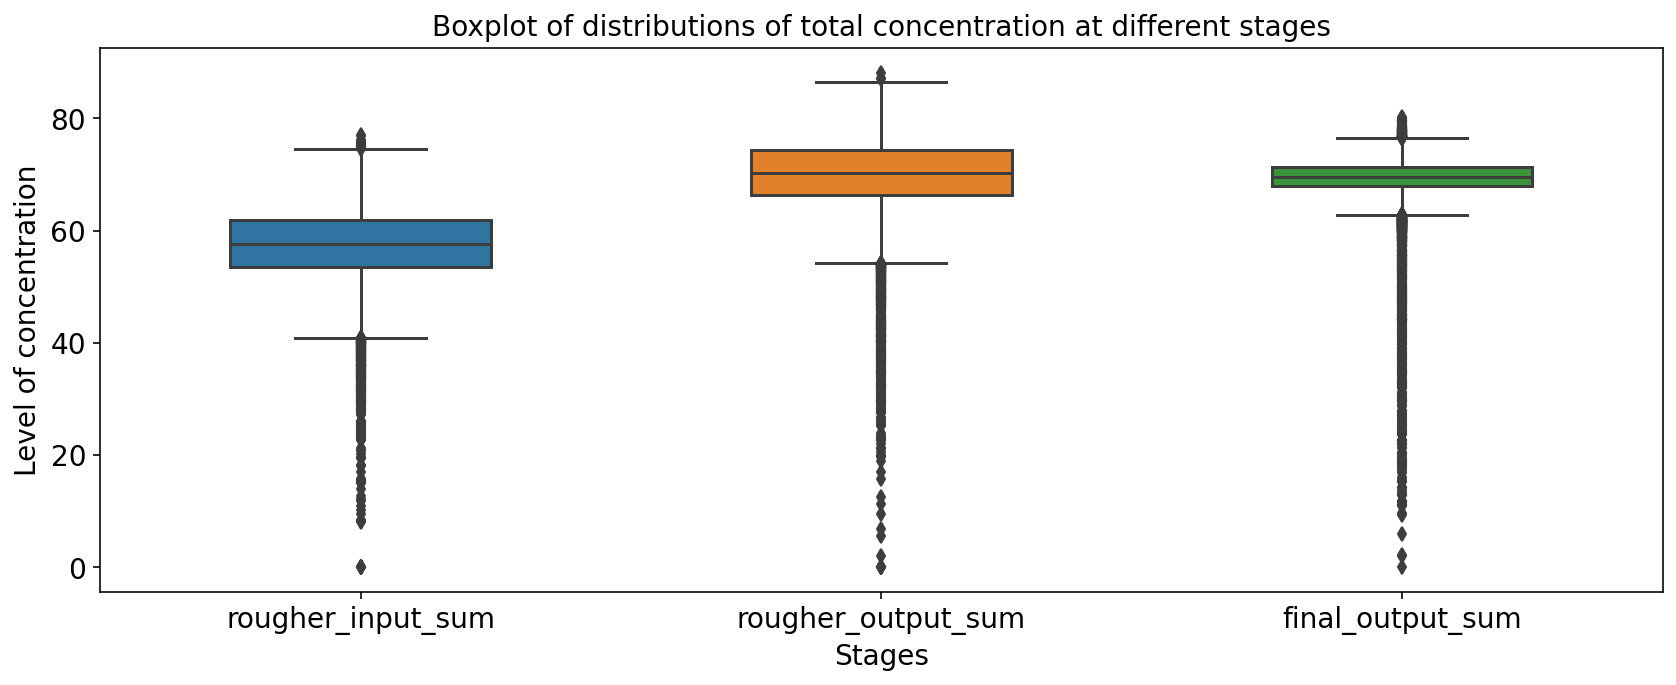

In [70]:
# ploting distribution graphs
drawDistributionPlot(sum_concentration_stages_upd,labels_columns, "Distributions of total concentration at different stages","Concentration fraction", "Number of value")
drawBoxPlot(sum_concentration_stages_upd,'Boxplot of distributions of total concentration at different stages', 'Stages', 'Level of concentration',True)

We've minimized the outliers in the data.

In [71]:
# let's take the indices from the original sample for the training sample
indexes = gold_recovery_full.index.tolist()

In [72]:
# Based on the indices obtained, we select the data for the training sample
gold_recovery_train = gold_recovery_train.loc[indexes]
# remove NaNs
gold_recovery_train = gold_recovery_train.dropna()

In [73]:
# Based on the indices obtained, we select the data for the testing sample
gold_recovery_test = gold_recovery_test.loc[indexes]
# remove NaNs
gold_recovery_test = gold_recovery_test.dropna()

We investigated the total concentration of all substances at different stages: in the raw material, rough, and final concentrates. We found that we had outliers. Outliers in the input data can distort and mislead machine learning algorithms, leading to lower model accuracy and, ultimately, worse results. Removed the outliers.

## Summary

At this stage we:
1. We looked at how the concentration of metals (Au, Ag, Pb) changes at different stages of purification:
      1. Gold (Au):
            - The *gold* average concentration level has increased at each stage of the process. If you compare the *final stage* and the *flotation stage*, the **average concentration has doubled**.
            - On the distribution graph, the *gold* concentration increases after each step. Also note that we have values where the concentration is 0.
      2. Silver (Ag):
            - This is where the situation is reversed. The *silver* concentration level is decreasing. If we compare the *final stage* and the *flotation stage*, the **average concentration value has decreased by 2 times**.
            - We see the same in the distribution graphs. The concentration level drops with each stage. Also notice that we have values where the concentration is 0.
      3. Lead (Pb):
            - The average concentration values in the *final stage* and the *primary cleanup stage* are almost the same. The average has increased compared to the *flotation* stage. If we compare the *final stage* and the *flotation stage*, the **average concentration has increased by two values**. Also note that we have values where the concentration is 0.
            - In the distribution plots, the *final stage* and *primary cleaner stage* values are distributed almost in the same gap.
2. We compared the distribution of granule sizes of raw materials on the training and test samples:
      1. Based on the graphs of the distribution of granule sizes on the raw material at the *flotation*,*primary cleaner* stages, we can say that the distributions are not very different from each other. Consequently, the data look good for the models.  
3. We researched the total concentration of all substances at different stages: in the raw material, rough and final concentrates:
      1. We investigated the total concentration of all substances at different stages: in the raw material, rough, and final concentrates. We found that we had outliers. Outliers in the input data can distort and mislead machine learning algorithms, leading to lower model accuracy and, ultimately, worse results.
      2. Removed the outliers.

<br>

<a id="MLmodelResearch"></a>
# Stage 6 - Machine Learning model research

At this stage we need to:
1. Write a function to calculate the final sMAPE
2. Investigate machine learning models. Find the best model.

<a id="sMAPEfunction"></a>
## sMAPE Function

Total sMAPE = 25% * sMAPE(rougher_recovery) + 75% * sMAPE(final_recovery)

In [74]:
def smape(target,predictions):
    """
    Function for calculating the total sMAPE. The function returns the total sMAPE
    target
    predictions
    """
    smape = np.sum((np.abs(target - predictions) * 2) / (np.abs(target) + np.abs(predictions))) / len(predictions) * 100
    total_smape = 0.25 * smape[0] + 0.75 * smape[1]
    return total_smape

In [75]:
# creating scorer
smape_scorer = make_scorer(smape, greater_is_better=False)

<a id="modelEvaluationWithCrossVal"></a>
## Model evaluation with cross-validation

We need to check each regression model. We will go through the hyperparameters and see the values of the metrics:
1. MSE (root mean square error) and RMSE (square root of mean square error).
2. Coefficient of determination, or R2 metric
3. MAE
4. sMAPE

We will keep the model predictions and correct answers on the validation sample.

First, let's write a function to separate the target feature from the other features.

In [76]:
def target_features_split(data,columns):
    """
    The function divides the data into target feature and features. The function returns 1) target feature, 2) features without target
    data - data that need to be separated
    column - target feature
    """
    return data[columns], data.drop(columns,axis=1)

Let's remove the date index. Split the samples into *target* and *features*.

In [77]:
train = gold_recovery_train.reset_index(drop=True)
train_target, train_features = target_features_split(train, ['rougher.output.recovery','final.output.recovery'])

In [78]:
test = gold_recovery_test.reset_index(drop=True)
test_target, test_features = target_features_split(test, ['rougher.output.recovery','final.output.recovery'])

We will keep track of machine learning models. We will create a list of models using a dictionary. Then from the dictionary we will convert the model table with all the metrics. 

In [79]:
ml_models_stats = dict()

Let's write a function to evaluate the models. 

In [80]:
def evaluate_model(model_name, model, smape_score,features_test, target_test,parameters=None):
    """
    The function evaluates the model on certain metrics, adds the model to the table with all metrics. Also, the function calculates the average stock of predicted raw materials and RMSE of the model
    The function returns the model predictions
    model_name 
    model 
    smape_score - smape score on training sample
    features_test - features on test sample
    target_test - target feature on test sample
    parameters 
    """
    print(f'Evaluation of the model: {model_name}')
    if parameters:
        print(f'with parameters: {parameters}')
    print()
    print(f'Metric sMAPE on training sample: {smape_score}')
    
    # making predictions
    predicted_test = model.predict(features_test)
    # MSE - Mean Squared Error
    mse = mean_squared_error(target_test, predicted_test)
    # RMSE - Root of Mean Squared Error
    rmse = mse ** 0.5
    # R2 - determination coefficient
    r2 = r2_score(target_test, predicted_test)
    print()
    # MAE - Mean Absolute Error
    mae = mean_absolute_error(target_test, predicted_test)
    # sMAPE on test sample
    smape_test = smape(target_test,predicted_test)
    # Displaying all metrics
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print(f'MAE: {mae}')
    print(f'sMAPE on test sample: {smape_test}')
    # Adding the model
    ml_models_stats[model_name] = {
        'name': model_name,
        'smape_train': smape_score,
        'smape_test':smape_test,
        'mse': mse,
        'rmse':rmse,
        'r2_score':r2,
        'mae':mae
    }
    print()
    print('Model has been successfully added to the table!')
    return predicted_test

We will find parameters with *GridSearchCV* and *RandomizedSearchCV* that have *cross-validation* built in.

<a id="LinearRegression"></a>
## Linear Regression

In [81]:
%%time
linear_model = LinearRegression()
# parameters for grid/random search
linear_parameters = {
    'copy_X': [True,False],
    'fit_intercept':[True,False],
    'n_jobs': [-1, 1,2,3,4,None]
}
linear_grid = GridSearchCV(estimator=linear_model, param_grid=linear_parameters, cv=5,scoring=smape_scorer)
linear_grid.fit(train_features,train_target)

CPU times: user 7.53 s, sys: 8.29 s, total: 15.8 s
Wall time: 8.21 s


In [82]:
linear_predicted = evaluate_model('Linear Regression', linear_grid,linear_grid.best_score_ , test_features, test_target,linear_grid.best_params_)

Evaluation of the model: Linear Regression
with parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}

Metric sMAPE on training sample: -10.059602069093591

MSE: 47.511370753693406
RMSE: 6.892849247857769
R2: -0.05822882876801205
MAE: 4.8654514541631535
sMAPE on test sample: 7.588623958312628

Model has been successfully added to the table!


Model scored - **7.588** on sMAPE metric on test sample

<a id="DecisionTree"></a>
## Decision Tree

In [83]:
%%time
decision_tree_model = DecisionTreeRegressor()
# parameters for grid/random search
decision_parameters = {
              "max_depth": range(1, 11),
              "min_samples_leaf": range(1, 11)
}

decision_grid =  RandomizedSearchCV(estimator=decision_tree_model, param_distributions=decision_parameters, cv=5,scoring=smape_scorer, n_iter = 20)
decision_grid.fit(train_features,train_target)

CPU times: user 43.8 s, sys: 123 ms, total: 43.9 s
Wall time: 43.7 s


In [84]:
decision_predicted = evaluate_model('Decision Tree', decision_grid,decision_grid.best_score_ , test_features, test_target,decision_grid.best_params_)

Evaluation of the model: Decision Tree
with parameters: {'min_samples_leaf': 8, 'max_depth': 1}

Metric sMAPE on training sample: -8.987481089659097

MSE: 44.62829502322063
RMSE: 6.6804412296809135
R2: -0.01690877568203253
MAE: 4.692763058659661
sMAPE on test sample: 7.217559460106489

Model has been successfully added to the table!


The model improved slightly (**7.217**) on the sMAPE metric on the test sample. 

<a id="randomForest"></a>
## Random Forest

In [85]:
%%time
random_forest_model = RandomForestRegressor()
# parameters for grid/random search
gs_params = {
    'max_depth': range(1, 21),
    'n_estimators':range(1,61,10)
}
forest_rs = RandomizedSearchCV(estimator=random_forest_model,param_distributions=gs_params,scoring=smape_scorer,cv=5,n_iter = 20)
forest_rs.fit(train_features,train_target)

CPU times: user 14min 23s, sys: 725 ms, total: 14min 24s
Wall time: 14min 21s


In [86]:
randomforest_predicted = evaluate_model('Random Forest', forest_rs,forest_rs.best_score_ , test_features, test_target,forest_rs.best_params_)

Evaluation of the model: Random Forest
with parameters: {'n_estimators': 11, 'max_depth': 3}

Metric sMAPE on training sample: -8.747785916024933

MSE: 42.70020501054577
RMSE: 6.534539387787465
R2: 0.02438768584098705
MAE: 4.56122460311895
sMAPE on test sample: 6.9277468463294385

Model has been successfully added to the table!


The Random Forest model improved slightly (**6.969**).

It is necessary to check the models for sanity. Let's check the *dummy* model and compare it with our models.

In [87]:
dummy_model = DummyRegressor(strategy="constant", constant=train_target.median())
dummy_model.fit(train_features,train_target)
dummy_predicted = dummy_model.predict(test_features)
dummy_smape_train = smape(test_target,dummy_predicted) 
dummy_predicted = evaluate_model('Dummy constant', dummy_model,dummy_smape_train, test_features, test_target)

Evaluation of the model: Dummy constant

Metric sMAPE on training sample: 7.3636606733944845

MSE: 45.46047258651977
RMSE: 6.74243817817559
R2: -0.04571404455131589
MAE: 4.787569375624674
sMAPE on test sample: 7.3636606733944845

Model has been successfully added to the table!


<a id="modelResearchResults"></a>
## Model research results

We tested 3 machine learning models (*Linear Regression*, *Decision Tree*, *Random Forest*). We found parameters with *GridSearchCV* and *RandomizedSearchCV*, which have *cross validation* built in.

Create the table from the models dictionary

In [88]:
ml_models = pd.DataFrame.from_dict(data=ml_models_stats, orient='index').reset_index(drop=True)
ml_models

,name,smape_train,smape_test,mse,rmse,r2_score,mae
0,Linear Regression,-10.060,7.589,47.511,6.893,-0.058,4.865
1,Decision Tree,-8.987,7.218,44.628,6.680,-0.017,4.693
2,Random Forest,-8.748,6.928,42.700,6.535,0.024,4.561
3,Dummy constant,7.364,7.364,45.460,6.742,-0.046,4.788


Models that have passed the sanity check.

In [89]:
approved_models = ml_models.query("smape_test < 7.363")
approved_models

,name,smape_train,smape_test,mse,rmse,r2_score,mae
1,Decision Tree,-8.987,7.218,44.628,6.680,-0.017,4.693
2,Random Forest,-8.748,6.928,42.700,6.535,0.024,4.561


**Linear regression fails the sanity check**.

Metrics to consider: **smape_train**, **smape_test**. 

Find thе best model on **smape_train** metric. 

,name,smape_train
0,Random Forest,-8.748
1,Decision Tree,-8.987


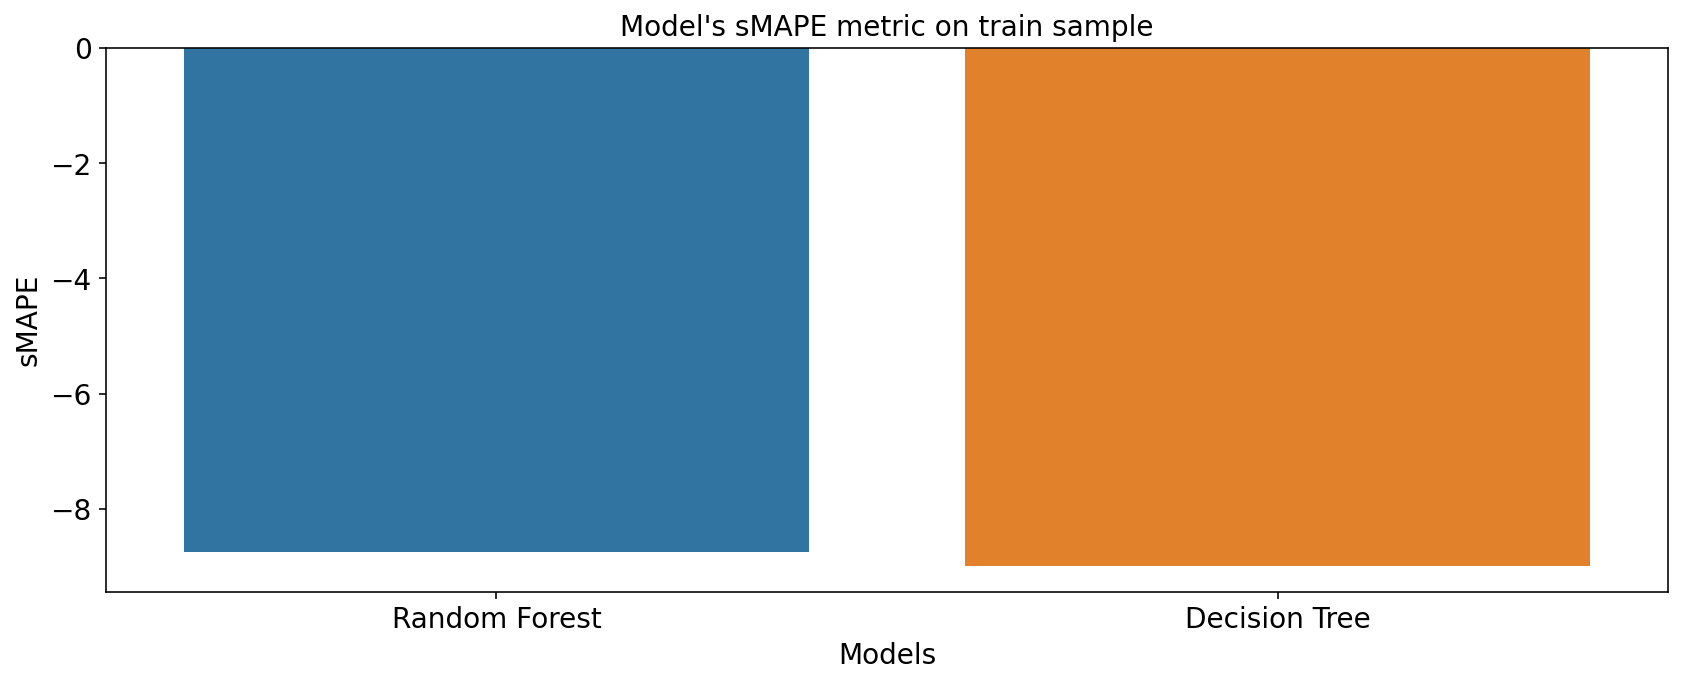

In [90]:
smape_train_sorted = approved_models.sort_values(by='smape_train',ascending=False).reset_index()
display(smape_train_sorted[['name','smape_train']])
drawPlot(smape_train_sorted, 'name','smape_train','Models','sMAPE',"Model's sMAPE metric on train sample",'name' )

Best model on train sample - **Random Forest**. (**-8.772**)

Let's proceed to **smape_test**.

,name,smape_test
0,Random Forest,6.928
1,Decision Tree,7.218


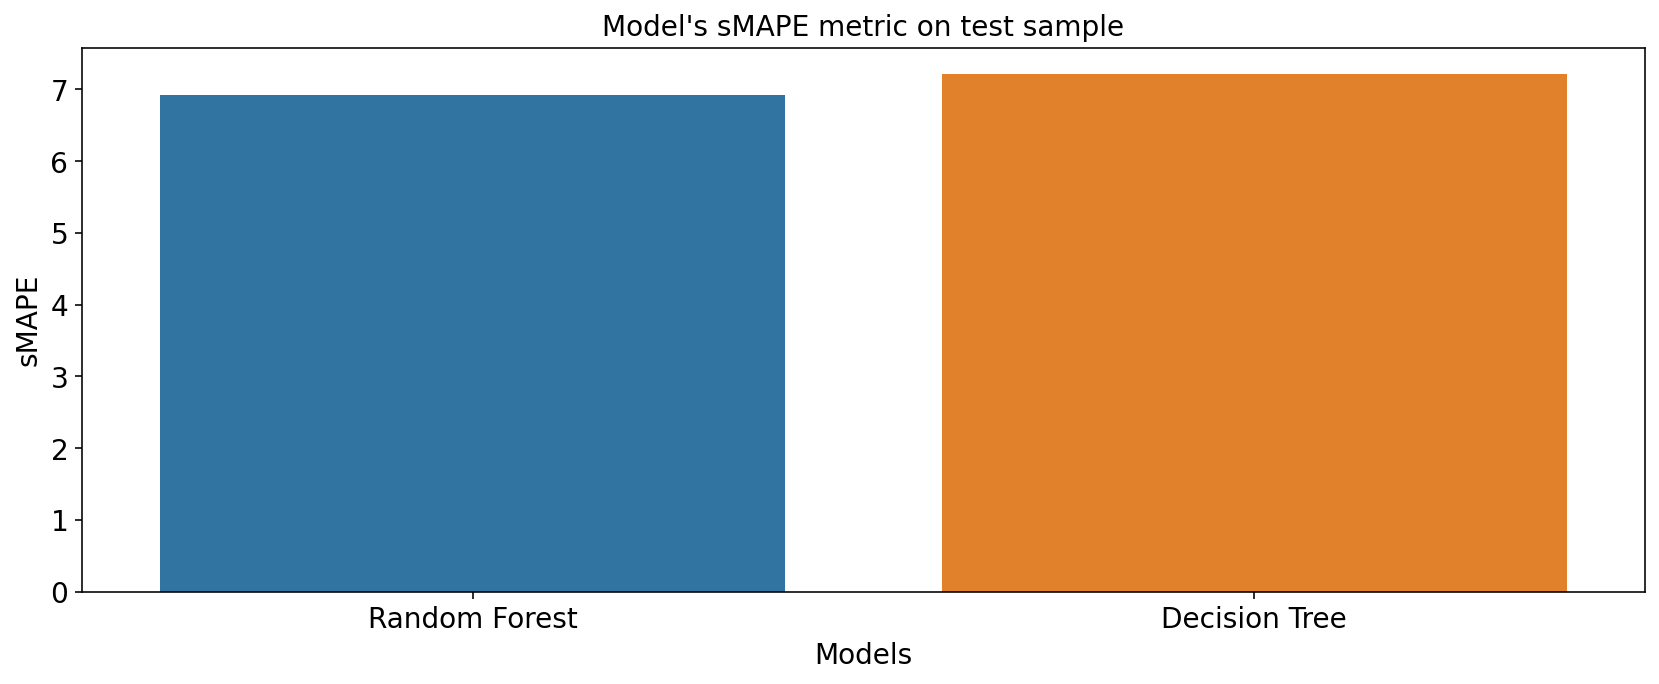

In [91]:
smape_test_sorted = approved_models.sort_values(by='smape_test',ascending=True).reset_index()
display(smape_test_sorted[['name','smape_test']])
drawPlot(smape_test_sorted, 'name','smape_test','Models','sMAPE',"Model's sMAPE metric on test sample",'name' )

**Random Forest** (**6.970**) - best model on metric sMAPE on test sample.

## Summary

At this stage we:
1. Wrote a function to calculate sMAPE
2. Researched Machine Learning models:
    - Found the parameters with *GridSearchCV* и *RandomizedSearchCV*
    - Linear Regression: model scored - **7.588** on sMAPe metric on test sample
    - Decision Tree: model scored - **7.217** on sMAPE metric on test sample. 
    - Random Forest: model score - **6.970**.
3. Made sanity check by comparing with *dummy* model. Linear Regression failed sanity check
4. Found the best model. Compared models on sMAPE metrics. Among 3 models - **Random Forest** (**6.970**) was the best model on sMAPE metric on test sample.

<br>

<a id="results"></a>
# Stage 7 - Results

We successfully built a model that predicts the recovery rate of gold from gold ore:
1. Tested the effectiveness of enrichment and analyzed features that are not available in the test sample:
    - The average standard deviation is practically equal to *0*. Consequently, the enrichment efficiency is calculated correctly using the formula.
    - We need to predict two target metrics: **rougher.output.recovery** - *performance of rough concentrate enrichment*,**final.output.recovery** - *performance of final concentrate enrichment*. We will leave these target attributes. The others are the features that are measured and/or calculated later, i.e. we cannot get them at the start. Therefore, we remove them.
2. Pre-processed data:
    - We changed the data type in the *date* column to an appropriate one.
    - We indexed the data by date and time.
    - We preprocessed the missing values by filling in the neighboring values and removing the missing values with the target feature.
    - Restored the target features in the test sample. Checked for similarity of target features by comparing with the original sample.
    - Checked data for duplicates.
3. Analyzed data:
    We looked at how the concentration of metals (Au, Ag, Pb) changes at different stages of purification:
      1. Gold (Au):
            - The *gold* average concentration level has increased at each stage of the process. If you compare the *final stage* and the *flotation stage*, the **average concentration has doubled**.
            - On the distribution graph, the *gold* concentration increases after each step. Also note that we have values where the concentration is 0.
      2. Silver (Ag):
            - This is where the situation is reversed. The *silver* concentration level is decreasing. If we compare the *final stage* and the *flotation stage*, the **average concentration value has decreased by 2 times**.
            - We see the same in the distribution graphs. The concentration level drops with each stage. Also notice that we have values where the concentration is 0.
      3. Lead (Pb):
            - The average concentration values in the *final stage* and the *primary cleanup stage* are almost the same. The average has increased compared to the *flotation* stage. If we compare the *final stage* and the *flotation stage*, the **average concentration has increased by two values**. Also note that we have values where the concentration is 0.
            - In the distribution plots, the *final stage* and *primary cleaner stage* values are distributed almost in the same gap.
    - We compared the distribution of granule sizes of raw materials on the training and test samples:
      1. Based on the graphs of the distribution of granule sizes on the raw material at the *flotation*,*primary cleaner* stages, we can say that the distributions are not very different from each other. Consequently, the data look good for the models. 
    - We researched the total concentration of all substances at different stages: in the raw material, rough and final concentrates:
      1. We investigated the total concentration of all substances at different stages: in the raw material, rough, and final concentrates. We found that we had outliers. Outliers in the input data can distort and mislead machine learning algorithms, leading to lower model accuracy and, ultimately, worse results.
      2. Removed the outliers.
4. Research Machine Learning models and evaluated their accuracy on sMAPE metric:
    1. Wrote a function to calculate sMAPE
    2. Researched Machine Learning models:
        - Found the parameters with *GridSearchCV* и *RandomizedSearchCV*
        - Linear Regression: model scored - **7.588** on sMAPe metric on test sample
        - Decision Tree: model scored - **7.217** on sMAPE metric on test sample. 
        - Random Forest: model score - **6.970**.
    3. Made sanity check by comparing with *dummy* model. Linear Regression failed sanity check
    4. Found the best model. Compared models on sMAPE metrics. 

Among 3 models - **Random Forest** (**6.970**) was the best model on sMAPE metric on test sample.